<a href="https://colab.research.google.com/github/artiebears13/SKLearn/blob/master/Covid%20analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df=pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv')
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,0.126,0.126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135101,ZWE,Africa,Zimbabwe,2021-11-18,133593.0,36.0,37.714,4699.0,0.0,0.714,8851.808,2.385,2.499,311.353,0.0,0.047,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3925.0,1424486.0,94.386,0.26,2900.0,0.192,0.013,76.9,tests performed,6310431.0,3583256.0,2727175.0,NaN,NaN,29822.0,41.81,23.74,18.07,NaN,1976.0,22810.0,0.151,44.44,15092171.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
135102,ZWE,Africa,Zimbabwe,2021-11-19,133593.0,0.0,37.714,4699.0,0.0,0.714,8851.808,0.000,2.499,311.353,0.0,0.047,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6362499.0,3625221.0,2737278.0,NaN,52068.0,33163.0,42.16,24.02,18.14,NaN,2197.0,25915.0,0.172,44.44,1

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df2=df[df['location']=='Russia']
#reindexing
new_index=range(0,len(df2))
df2.reset_index(drop=True,inplace=True)
df2

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,RUS,Europe,Russia,2020-01-31,2.0,2.0,NaN,NaN,NaN,NaN,0.014,0.014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,145912022.0,8.823,39.6,14.178,9.393,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824,-5528.7,-3.32,-3.32,-37.890641
1,RUS,Europe,Russia,2020-02-01,2.0,0.0,NaN,NaN,NaN,NaN,0.014,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,145912022.0,8.823,39.6,14.178,9.393,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824,NaN,NaN,NaN,NaN
2,RUS,Europe,Russia,2020-02-02,2.0,0.0,NaN,NaN,NaN,NaN,0.014,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,145912022.0,8.823,39.6,14.178,9.393,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824,NaN,NaN,NaN,NaN
3,RUS,Europe,Russia,2020-02-03,2.0,0.0,NaN,NaN,NaN,NaN,0.014,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,145912022.0,8.823,39.6,14.178,9.393,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824,NaN,NaN,NaN,NaN
4,RUS,Europe,Russia,2020-02-04,2.0,0.0,NaN,NaN,NaN,NaN,0.014,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,145912022.0,8.823,39.6,14.178,9.393,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
657,RUS,Europe,Russia,2021-11-18,9063318.0,36155.0,37003.000,255448.0,1219.0,1206.857,62114.950,247.786,253.598,1750.699,8.354,8.271,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,463705.0,3.178,0.08,12.5,tests performed,117352790.0,62891581.0,52506988.0,2767890.0,726364.0,835405.0,80.43,43.10,35.99,1.90,5725.0,478345.0,0.328,NaN,145912022.0,8.823,39.6,14.178,9.393,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824,NaN,NaN,NaN,NaN
658,RUS,Europe,Russia,2021-11-19,9099253.0,35935.0,36573.571,256669.0,1221.0,1209.429,62361.229,246.279,250.655,1759.067,8.368,8.289,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,219459637.0,1504.055,NaN,492473.0,3.375,NaN,NaN,tests performed,118078630.0,63284

In [4]:
df2.to_excel('Russia_08_11.xlsx')
df2.to_csv('Russia_08_11.csv')

In [5]:
#fill NaN
index_last=0
df2.at[df2.index[0],'total_tests']=0
for i in range(len(df2)-1):
    if np.isnan(df2.at[df2.index[i],'total_tests'])==True:
        df2.at[df2.index[i],'total_tests']=df2.at[df2.index[index_last],'total_tests']
    else:
        index_last=i
df2.at[df2.index[-1],'total_tests']=df2.at[df2.index[index_last],'total_tests']

index_last=0
df2.at[df2.index[0],'total_vaccinations']=0
for i in range(len(df2)-1):
    if np.isnan(df2.at[df2.index[i],'total_vaccinations'])==True:
        df2.at[df2.index[i],'total_vaccinations']=df2.at[df2.index[index_last],'total_vaccinations']
    else:
        index_last=i
df2.at[df2.index[-1],'total_vaccinations']=df2.at[df2.index[index_last],'total_vaccinations']


index_last=0
df2.at[df2.index[0],'total_deaths']=0
for i in range(len(df2)-1):
    if np.isnan(df2.at[df2.index[i],'total_deaths'])==True:
        df2.at[df2.index[i],'total_deaths']=df2.at[df2.index[index_last],'total_deaths']
    else:
        index_last=i
df2.at[df2.index[-1],'total_deaths']=df2.at[df2.index[index_last],'total_deaths']


df2['vax_rate']=df2.total_vaccinations/df2.population*100
df2['test_rate']=df2.total_tests/df2.population*100
df2['case_rate']=df2.total_cases/df2.population*100
df2['death_rate']=df2.total_deaths/df2.population*100

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

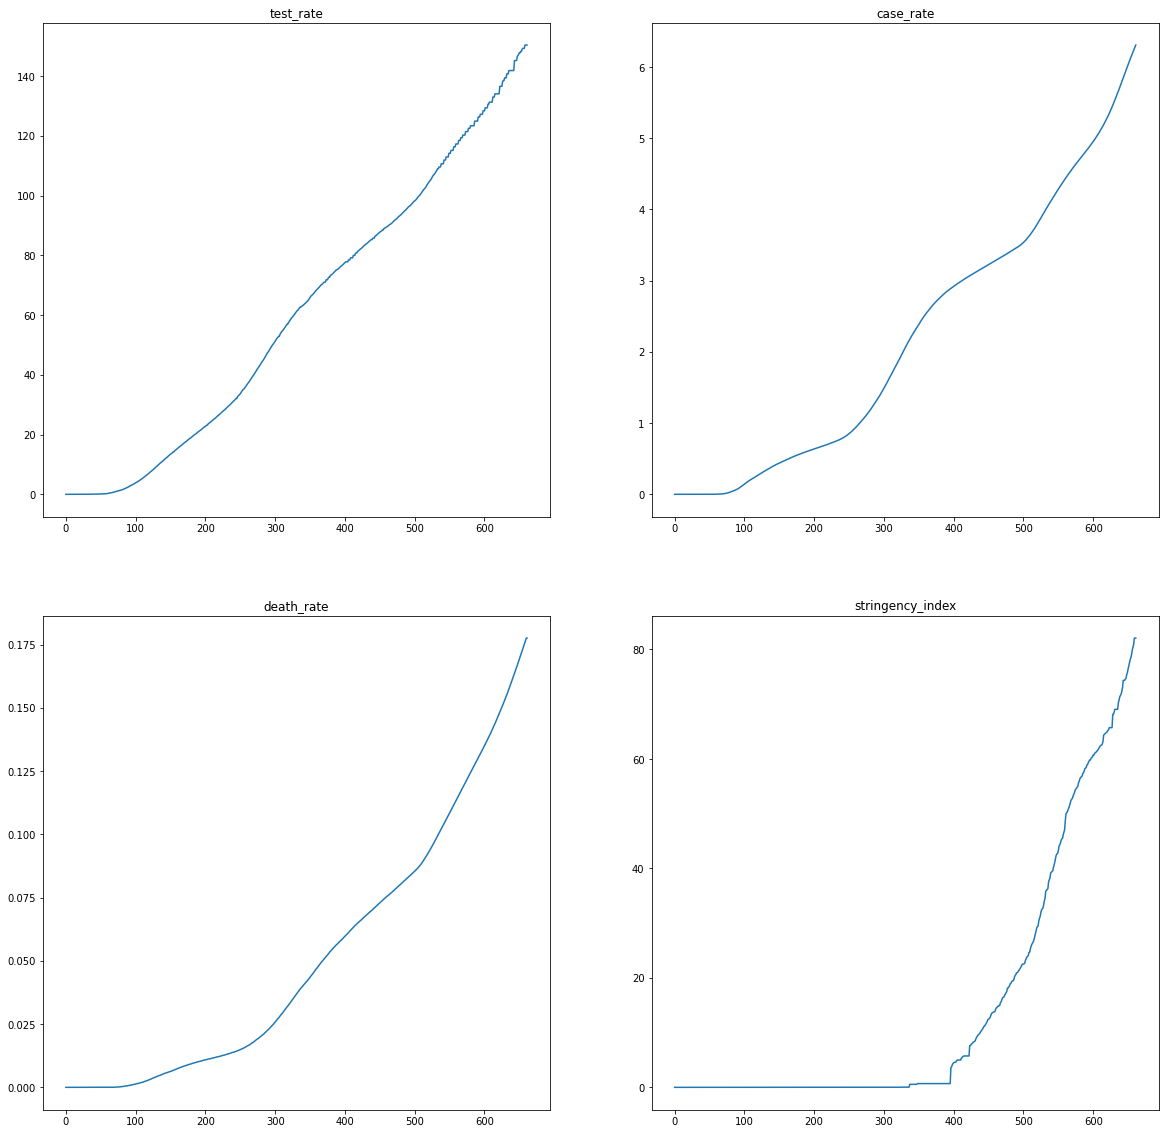

In [6]:




fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(20,20),sharex=True, sharey=False)

plt.subplot(2,2, 1)
plt.plot(df2['test_rate'])
plt.title('test_rate')

plt.subplot(2,2, 2)
plt.plot(df2['case_rate'])
plt.title('case_rate')

plt.subplot(2,2, 3)
plt.plot(df2['death_rate'])
plt.title('death_rate')

plt.subplot(2,2, 4)
plt.plot(df2['vax_rate'])
plt.title('stringency_index')

plt.show()

In [7]:
df2['test_rate'].corr(df2['case_rate'])

0.9951863568311082

In [8]:
df2['test_rate'].corr(df2['death_rate'])

0.9758055353516684

stringency_index-индекс строгости - это мера строгости страны в отношении количества введенных ограничений covid, от 0 до 100, где 0 является самым низким. Сама по себе строгость показывает довольно низкую корреляцию с уровнем смертности или инфекций, поскольку страны, указанные точками, довольно разбросаны по всему миру. Очень небольшая разница в уровнях смертности и инфицирования объясняется строгостью, и это может быть подтверждено следующей статистикой корреляции.

In [9]:
df2['stringency_index'].corr(df2['case_rate'])

-0.20674443689527283

In [10]:
df2['vax_rate'].corr(df2['case_rate'])

0.8773389199995818

In [11]:
df2['aged_65_older'].corr(df2['death_rate'])

3.7208391458817695e-16

In [12]:
df2['aged_65_older'].corr(df2['case_rate'])

3.7314263515846697e-16


# Прогнозирование уровня вакцинации

In [13]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from IPython.display import display
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
import statsmodels.formula.api as smf
from statsmodels.regression.linear_model import OLS
from sklearn.linear_model import LinearRegression
import math
from math import sqrt
from sklearn.metrics import mean_squared_error
from random import random
import datetime as dt
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [14]:
#Keeping only relevant columns
df = df[['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases','total_deaths', 'new_deaths','reproduction_rate', 'icu_patients',
         'hosp_patients','new_tests', 'total_tests','positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations','stringency_index',
       'population', 'population_density', 'median_age', 'aged_65_older',
       'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy', 'human_development_index']]
#A very important step
df['date'] = pd.to_datetime(df['date'])

In [ ]:
df.dtypes

iso_code                              object
continent                             object
location                              object
date                          datetime64[ns]
total_cases                          float64
new_cases                            float64
total_deaths                         float64
new_deaths                           float64
reproduction_rate                    float64
icu_patients                         float64
hosp_patients                        float64
new_tests                            float64
total_tests                          float64
positive_rate                        float64
tests_per_case                       float64
tests_units                           object
total_vaccinations                   float64
people_vaccinated                    float64
people_fully_vaccinated              float64
new_vaccinations                     float64
stringency_index                     float64
population                           float64
population

In [15]:
# Creating function for additional columns and some analyses
def analyse_df(df):
    df['case_rate'] = (df['total_cases']/df['population'])*100
    df['death_rate'] = (df['total_deaths']/df['population'])*100
    df['test_rate'] = (df['total_tests']/df['population'])*100
    df['admissions_rate'] = (df['hosp_patients']/df['population'])*100
    df['critical_rate'] = (df['icu_patients']/df['population'])*100
    df['vaccination_rate'] = (df['people_fully_vaccinated']/df['population'])*100
    print('Columns: ', df.columns)
    print('Dataframe shape: ', df.shape)
    print('Date Range', df['date'].min(),df['date'].max())
    #get some stats for each country using groupby
    stats_df = df.groupby('location')[['date','case_rate','death_rate','test_rate','vaccination_rate',
                    'admissions_rate','critical_rate','stringency_index',
                                 'population']].agg({"date":['max', 'count'],
                 'case_rate':'max','death_rate':'max','test_rate':'max','vaccination_rate':'max',
                    'admissions_rate':'mean','critical_rate':'mean','stringency_index':'mean','population':'mean'})
    display(stats_df)
    display(df.corr())
    sns.heatmap(df.corr(), vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(20, 220, n=200),square=True)
    plt.xticks(rotation=45)
    rcParams['figure.figsize'] = 12,8
    return df, stats_df

Columns:  Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'total_deaths', 'new_deaths', 'reproduction_rate', 'icu_patients',
       'hosp_patients', 'new_tests', 'total_tests', 'positive_rate',
       'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'stringency_index', 'population', 'population_density', 'median_age',
       'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy', 'human_development_index', 'case_rate', 'death_rate',
       'test_rate', 'admissions_rate', 'critical_rate', 'vaccination_rate'],
      dtype='object')
Dataframe shape:  (135106, 42)
Date Range 2020-01-01 00:00:00 2021-11-22 00:00:00


date        ... stringency_index    population
                         max count  ...             mean          mean
location                            ...                               
Afghanistan       2021-11-22   638  ...        38.700895  3.983543e+07
Africa            2021-11-22   649  ...              NaN  1.373486e+09
Albania           2021-11-22   637  ...        56.939299  2.872934e+06
Algeria           2021-11-22   637  ...        66.250747  4.461663e+07
Andorra           2021-11-22   631  ...        48.402048  7.735400e+04
...                      ...   ...  ...              ...           ...
Wallis and Futuna 2021-11-15   238  ...              NaN  1.109400e+04
World             2021-11-22   671  ...              NaN  7.874966e+09
Yemen             2021-11-22   592  ...        34.262509  3.049064e+07
Zambia            2021-11-22   615  ...        44.965543  1.892066e+07
Zimbabwe          2021-11-22   613  ...        68.483546  1.509217e+07

[237 rows x 10 columns]

,total_cases,new_cases,total_deaths,new_deaths,reproduction_rate,icu_patients,hosp_patients,new_tests,total_tests,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,case_rate,death_rate,test_rate,admissions_rate,critical_rate,vaccination_rate
total_cases,1.000000,0.812994,0.984993,0.752533,-0.000922,0.759062,6.874956e-01,0.778370,0.936001,-0.015465,-0.035596,0.805152,0.834453,0.778151,0.789662,0.040164,0.649432,-0.016131,0.032554,0.028961,0.025731,0.015430,-0.035275,-0.036496,0.018279,-0.004202,-0.008545,3.343835e-02,-0.007833,0.020993,0.036251,0.117468,0.137783,0.059692,2.553568e-02,0.163528,0.015193
new_cases,0.812994,1.000000,0.820099,0.924154,0.016491,0.899630,8.855550e-01,0.719959,0.566469,0.101922,-0.040254,0.545678,0.558268,0.502563,0.647820,0.093111,0.717400,-0.017934,0.037015,0.032758,0.029185,0.015992,-0.040048,-0.038929,0.019446,-0.005518,-0.005128,3.933388e-02,-0.006737,0.023474,0.040536,0.062873,0.078950,0.016785,1.413650e-01,0.292918,-0.080572
total_deaths,0.984993,0.820099,1.000000,0.785897,-0.001093,0.769914,7.116609e-01,0.693956,0.817425,0.031828,-0.046669,0.776204,0.800700,0.748304,0.770975,0.043461,0.659959,-0.019496,0.032141,0.027510,0.024761,0.008364,-0.041593,-0.041169,0.024437,-0.007058,-0.005874,4.057877e-02,-0.010127,0.022791,0.037317,0.105024,0.162291,0.030055,2.940215e-02,0.164813,0.003686
new_deaths,0.752533,0.924154,0.785897,1.000000,0.005653,0.869883,8.834194e-01,0.606569,0.461509,0.183887,-0.050007,0.484613,0.496052,0.430311,0.625858,0.128344,0.735166,-0.021747,0.033403,0.026313,0.022918,0.003844,-0.045865,-0.036843,0.027955,-0.011819,0.002057,4.727657e-02,-0.008931,0.020865,0.037522,0.031755,0.078227,-0.030594,2.066559e-01,0.353900,-0.130895
reproduction_rate,-0.000922,0.016491,-0.001093,0.005653,1.000000,-0.062779,-6.881749e-02,-0.031460,-0.037364,0.081948,-0.106697,-0.001463,-0.010657,-0.006077,-0.009541,0.161546,0.034896,0.005829,0.166835,0.161663,0.156691,0.083058,-0.176358,-0.050033,-0.015762,0.112527,0.010161,1.469800e-01,0.081747,0.154761,0.168040,-0.003158,-0.011635,-0.032637,-1.277220e-01,-0.183868,0.074033
icu_patients,0.759062,0.899630,0.769914,0.869883,-0.062779,1.000000,9.629914e-01,0.794695,0.719574,0.114643,-0.094012,0.589216,0.603492,0.568274,0.542409,0.158815,0.844164,-0.101921,-0.035945,-0.016782,-0.015277,0.119038,0.100886,-0.083415,0.190146,0.009379,-0.107573,5.229586e-01,-0.062676,-0.069934,0.100871,0.126445,0.178327,-0.035061,1.564582e-01,0.356931,-0.070609
hosp_patients,0.687496,0.885555,0.711661,0.883419,-0.068817,0.962991,1.000000e+00,0.754195,0.653579,0.206982,-0.117278,0.519144,0.535010,0.501106,0.534768,0.228954,0.802797,-0.087047,-0.035496,-0.010454,-0.012651,0.046756,0.361490,-0.080615,0.167129,-0.006884,-0.078993,1.737597e-15,-0.094513,-0.039109,0.019023,0.102497,0.169799,-0.053521,2.887185e-01,0.404191,-0.112134
new_tests,0.778370,0.719959,0.693956,0.606569,-0.031460,0.794695,7.541955e-01,1.000000,0.834187,-0.083269,-0.014541,0.631228,0.627536,0.601919,0.615265,0.058696,0.618547,0.006105,0.099591,0.100360,0.097111,0.114174,-0.052755,-0.049166,0.086585,0.072191,-0.053506,2.720612e-02,-0.018537,0.069442,0.115015,0.177919,0.151296,0.152846,3.931486e-02,0.193646,0.034469
total_tests,0.936001,0.566469,0.817425,0.461509,-0.037364,0.719574,6.535793e-01,0.834187,1.000000,-0.078130,-0.010653,0.835917,0.803597,0.853269,0.648505,-0.003316,0.544604,-0.001720,0.072497,0.071601,0.067494,0.100899,-0.043270,-0.029673,0.093958,0.047452,-0.061792,1.833274e-02,-0.030169,0.047851,0.093721,0.229996,0.182334,0.179348,-1.654904e-02,0.147578,0.112833
positive_rate,-0.015465,0.101922,0.031828,0.183887,0.081948,0.114643,2.069823e-01,-0.083269,-0.078130,1.000000,-

Columns:  Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'total_deaths', 'new_deaths', 'reproduction_rate', 'icu_patients',
       'hosp_patients', 'new_tests', 'total_tests', 'positive_rate',
       'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'stringency_index', 'population', 'population_density', 'median_age',
       'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy', 'human_development_index', 'case_rate', 'death_rate',
       'test_rate', 'admissions_rate', 'critical_rate', 'vaccination_rate'],
      dtype='object')
Dataframe shape:  (135106, 42)
Date Range 2020-01-01 00:00:00 2021-11-22 00:00:00


date        ... stringency_index    population
                         max count  ...             mean          mean
location                            ...                               
Afghanistan       2021-11-22   638  ...        38.700895  3.983543e+07
Africa            2021-11-22   649  ...              NaN  1.373486e+09
Albania           2021-11-22   637  ...        56.939299  2.872934e+06
Algeria           2021-11-22   637  ...        66.250747  4.461663e+07
Andorra           2021-11-22   631  ...        48.402048  7.735400e+04
...                      ...   ...  ...              ...           ...
Wallis and Futuna 2021-11-15   238  ...              NaN  1.109400e+04
World             2021-11-22   671  ...              NaN  7.874966e+09
Yemen             2021-11-22   592  ...        34.262509  3.049064e+07
Zambia            2021-11-22   615  ...        44.965543  1.892066e+07
Zimbabwe          2021-11-22   613  ...        68.483546  1.509217e+07

[237 rows x 10 columns]

,total_cases,new_cases,total_deaths,new_deaths,reproduction_rate,icu_patients,hosp_patients,new_tests,total_tests,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,case_rate,death_rate,test_rate,admissions_rate,critical_rate,vaccination_rate
total_cases,1.000000,0.812994,0.984993,0.752533,-0.000922,0.759062,6.874956e-01,0.778370,0.936001,-0.015465,-0.035596,0.805152,0.834453,0.778151,0.789662,0.040164,0.649432,-0.016131,0.032554,0.028961,0.025731,0.015430,-0.035275,-0.036496,0.018279,-0.004202,-0.008545,3.343835e-02,-0.007833,0.020993,0.036251,0.117468,0.137783,0.059692,2.553568e-02,0.163528,0.015193
new_cases,0.812994,1.000000,0.820099,0.924154,0.016491,0.899630,8.855550e-01,0.719959,0.566469,0.101922,-0.040254,0.545678,0.558268,0.502563,0.647820,0.093111,0.717400,-0.017934,0.037015,0.032758,0.029185,0.015992,-0.040048,-0.038929,0.019446,-0.005518,-0.005128,3.933388e-02,-0.006737,0.023474,0.040536,0.062873,0.078950,0.016785,1.413650e-01,0.292918,-0.080572
total_deaths,0.984993,0.820099,1.000000,0.785897,-0.001093,0.769914,7.116609e-01,0.693956,0.817425,0.031828,-0.046669,0.776204,0.800700,0.748304,0.770975,0.043461,0.659959,-0.019496,0.032141,0.027510,0.024761,0.008364,-0.041593,-0.041169,0.024437,-0.007058,-0.005874,4.057877e-02,-0.010127,0.022791,0.037317,0.105024,0.162291,0.030055,2.940215e-02,0.164813,0.003686
new_deaths,0.752533,0.924154,0.785897,1.000000,0.005653,0.869883,8.834194e-01,0.606569,0.461509,0.183887,-0.050007,0.484613,0.496052,0.430311,0.625858,0.128344,0.735166,-0.021747,0.033403,0.026313,0.022918,0.003844,-0.045865,-0.036843,0.027955,-0.011819,0.002057,4.727657e-02,-0.008931,0.020865,0.037522,0.031755,0.078227,-0.030594,2.066559e-01,0.353900,-0.130895
reproduction_rate,-0.000922,0.016491,-0.001093,0.005653,1.000000,-0.062779,-6.881749e-02,-0.031460,-0.037364,0.081948,-0.106697,-0.001463,-0.010657,-0.006077,-0.009541,0.161546,0.034896,0.005829,0.166835,0.161663,0.156691,0.083058,-0.176358,-0.050033,-0.015762,0.112527,0.010161,1.469800e-01,0.081747,0.154761,0.168040,-0.003158,-0.011635,-0.032637,-1.277220e-01,-0.183868,0.074033
icu_patients,0.759062,0.899630,0.769914,0.869883,-0.062779,1.000000,9.629914e-01,0.794695,0.719574,0.114643,-0.094012,0.589216,0.603492,0.568274,0.542409,0.158815,0.844164,-0.101921,-0.035945,-0.016782,-0.015277,0.119038,0.100886,-0.083415,0.190146,0.009379,-0.107573,5.229586e-01,-0.062676,-0.069934,0.100871,0.126445,0.178327,-0.035061,1.564582e-01,0.356931,-0.070609
hosp_patients,0.687496,0.885555,0.711661,0.883419,-0.068817,0.962991,1.000000e+00,0.754195,0.653579,0.206982,-0.117278,0.519144,0.535010,0.501106,0.534768,0.228954,0.802797,-0.087047,-0.035496,-0.010454,-0.012651,0.046756,0.361490,-0.080615,0.167129,-0.006884,-0.078993,1.737597e-15,-0.094513,-0.039109,0.019023,0.102497,0.169799,-0.053521,2.887185e-01,0.404191,-0.112134
new_tests,0.778370,0.719959,0.693956,0.606569,-0.031460,0.794695,7.541955e-01,1.000000,0.834187,-0.083269,-0.014541,0.631228,0.627536,0.601919,0.615265,0.058696,0.618547,0.006105,0.099591,0.100360,0.097111,0.114174,-0.052755,-0.049166,0.086585,0.072191,-0.053506,2.720612e-02,-0.018537,0.069442,0.115015,0.177919,0.151296,0.152846,3.931486e-02,0.193646,0.034469
total_tests,0.936001,0.566469,0.817425,0.461509,-0.037364,0.719574,6.535793e-01,0.834187,1.000000,-0.078130,-0.010653,0.835917,0.803597,0.853269,0.648505,-0.003316,0.544604,-0.001720,0.072497,0.071601,0.067494,0.100899,-0.043270,-0.029673,0.093958,0.047452,-0.061792,1.833274e-02,-0.030169,0.047851,0.093721,0.229996,0.182334,0.179348,-1.654904e-02,0.147578,0.112833
positive_rate,-0.015465,0.101922,0.031828,0.183887,0.081948,0.114643,2.069823e-01,-0.083269,-0.078130,1.000000,-

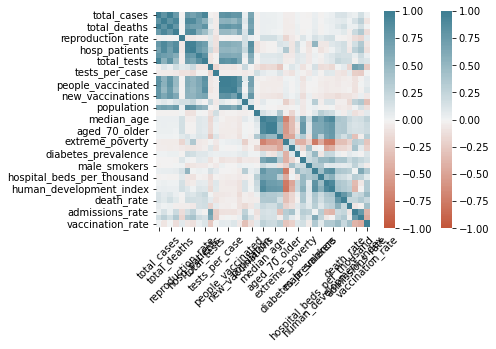

In [16]:
df = analyse_df(df)[0]
stats_df = analyse_df(df)[1]

In [17]:
def poly(name, group):
    # transfrom the date into an integer to be able to fit it into the model
    group['date_transformed'] = group['date'].map(dt.datetime.toordinal) 
    # Create a range to be able to tell the model later to predict within this range. I want to predict for a range that is 10 points more than half the number of observations in input data.
    Range = group['date_transformed'].max() + round(len(group)/2) + 10
    predict_dates = list(range(group['date_transformed'].max() + 1, Range))
    
    # Build the model
    # Make sure to transfrom the input data
    x = group['date_transformed'].values[:,np.newaxis]
    y = group['vaccination_rate'].values
    polynomial_features = PolynomialFeatures(degree=2)
    x_poly = polynomial_features.fit_transform(x)
    model = LinearRegression()
    model.fit(x_poly, y)
    # Test the model and its accuracy
    y_poly_pred = model.predict(x_poly)
    rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
    r2 = r2_score(y,y_poly_pred)
    # Save the predictions as a column of the input data
    group['Pred'] = y_poly_pred
    group_export = group[['date','vaccination_rate','Pred']].set_index('date')
    # View results
    print(name)
    print('rmse: ', rmse)
    print('r2: ', r2)
    return model, polynomial_features, predict_dates, group_export

In [18]:
# Create grouped data for access later
df_grouped = df.groupby(['iso_code','continent','location'])


 ------------- ('ABW', 'North America', 'Aruba') --------------
('ABW', 'North America', 'Aruba')
rmse:  3.4319581324429613
r2:  0.9657026151025446
('ABW', 'North America', 'Aruba')
rmse:  3.4319581324429613
r2:  0.9657026151025446
('ABW', 'North America', 'Aruba')
rmse:  3.4319581324429613
r2:  0.9657026151025446
('ABW', 'North America', 'Aruba')
rmse:  3.4319581324429613
r2:  0.9657026151025446


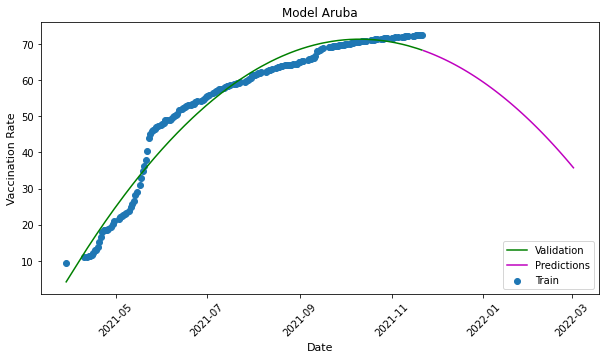

Observations in Actual Data = 184.000000, Predicted Observations=101.000000

 ------------- ('AFG', 'Asia', 'Afghanistan') --------------

 ------------- ('AGO', 'Africa', 'Angola') --------------

 ------------- ('AIA', 'North America', 'Anguilla') --------------

 ------------- ('ALB', 'Europe', 'Albania') --------------
('ALB', 'Europe', 'Albania')
rmse:  0.6647624939032477
r2:  0.9937832595502999
('ALB', 'Europe', 'Albania')
rmse:  0.6647624939032477
r2:  0.9937832595502999
('ALB', 'Europe', 'Albania')
rmse:  0.6647624939032477
r2:  0.9937832595502999
('ALB', 'Europe', 'Albania')
rmse:  0.6647624939032477
r2:  0.9937832595502999


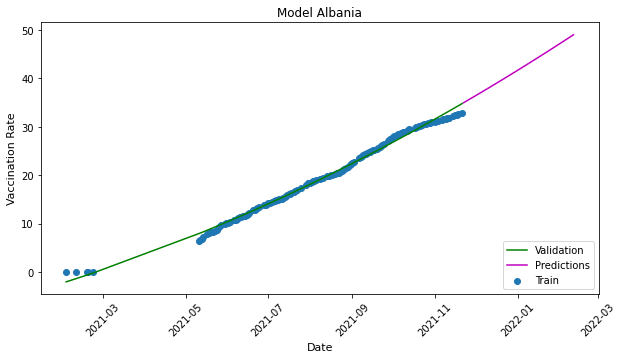

Observations in Actual Data = 146.000000, Predicted Observations=82.000000

 ------------- ('AND', 'Europe', 'Andorra') --------------

 ------------- ('ARE', 'Asia', 'United Arab Emirates') --------------
('ARE', 'Asia', 'United Arab Emirates')
rmse:  0.6045341539146472
r2:  0.9975581530122528
('ARE', 'Asia', 'United Arab Emirates')
rmse:  0.6045341539146472
r2:  0.9975581530122528
('ARE', 'Asia', 'United Arab Emirates')
rmse:  0.6045341539146472
r2:  0.9975581530122528
('ARE', 'Asia', 'United Arab Emirates')
rmse:  0.6045341539146472
r2:  0.9975581530122528


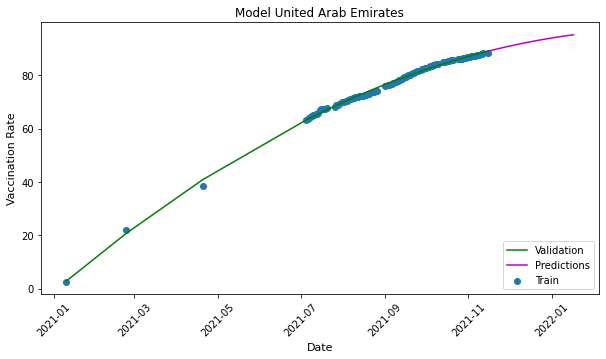

Observations in Actual Data = 108.000000, Predicted Observations=63.000000

 ------------- ('ARG', 'South America', 'Argentina') --------------
('ARG', 'South America', 'Argentina')
rmse:  2.8888953083432285
r2:  0.9800043337782811
('ARG', 'South America', 'Argentina')
rmse:  2.8888953083432285
r2:  0.9800043337782811
('ARG', 'South America', 'Argentina')
rmse:  2.8888953083432285
r2:  0.9800043337782811
('ARG', 'South America', 'Argentina')
rmse:  2.8888953083432285
r2:  0.9800043337782811


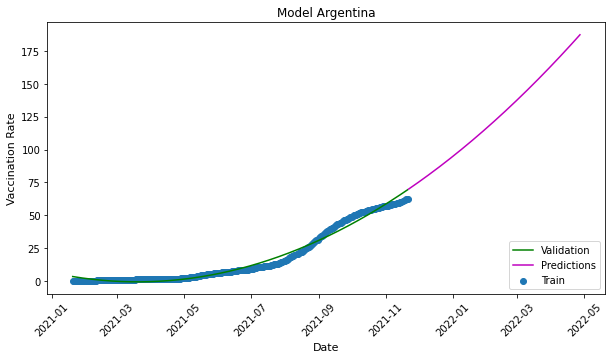

Observations in Actual Data = 295.000000, Predicted Observations=157.000000

 ------------- ('ARM', 'Asia', 'Armenia') --------------

 ------------- ('ATG', 'North America', 'Antigua and Barbuda') --------------
('ATG', 'North America', 'Antigua and Barbuda')
rmse:  3.1670107384527997
r2:  0.922867370314209
('ATG', 'North America', 'Antigua and Barbuda')
rmse:  3.1670107384527997
r2:  0.922867370314209
('ATG', 'North America', 'Antigua and Barbuda')
rmse:  3.1670107384527997
r2:  0.922867370314209
('ATG', 'North America', 'Antigua and Barbuda')
rmse:  3.1670107384527997
r2:  0.922867370314209


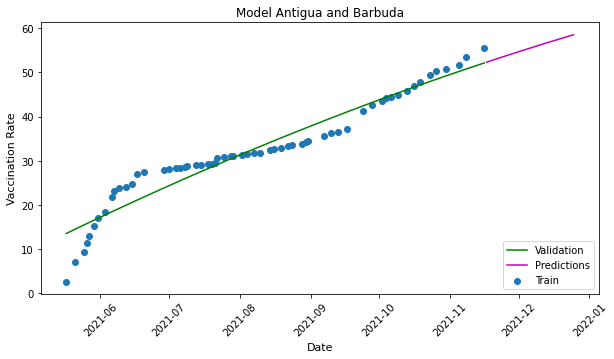

Observations in Actual Data = 61.000000, Predicted Observations=39.000000

 ------------- ('AUS', 'Oceania', 'Australia') --------------
('AUS', 'Oceania', 'Australia')
rmse:  1.5353001401118285
r2:  0.9955920714917429
('AUS', 'Oceania', 'Australia')
rmse:  1.5353001401118285
r2:  0.9955920714917429
('AUS', 'Oceania', 'Australia')
rmse:  1.5353001401118285
r2:  0.9955920714917429
('AUS', 'Oceania', 'Australia')
rmse:  1.5353001401118285
r2:  0.9955920714917429


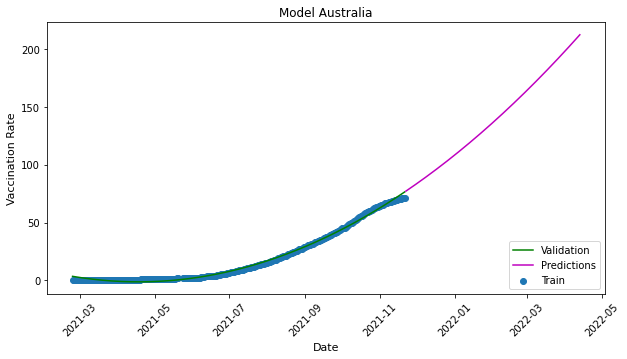

Observations in Actual Data = 267.000000, Predicted Observations=143.000000

 ------------- ('AUT', 'Europe', 'Austria') --------------
('AUT', 'Europe', 'Austria')
rmse:  6.128123602063919
r2:  0.9384859704883911
('AUT', 'Europe', 'Austria')
rmse:  6.128123602063919
r2:  0.9384859704883911
('AUT', 'Europe', 'Austria')
rmse:  6.128123602063919
r2:  0.9384859704883911
('AUT', 'Europe', 'Austria')
rmse:  6.128123602063919
r2:  0.9384859704883911


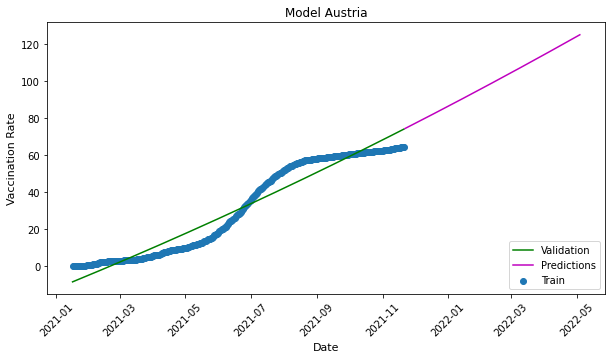

Observations in Actual Data = 310.000000, Predicted Observations=164.000000

 ------------- ('AZE', 'Asia', 'Azerbaijan') --------------
('AZE', 'Asia', 'Azerbaijan')
rmse:  1.5203786132840726
r2:  0.9876473503827631
('AZE', 'Asia', 'Azerbaijan')
rmse:  1.5203786132840726
r2:  0.9876473503827631
('AZE', 'Asia', 'Azerbaijan')
rmse:  1.5203786132840726
r2:  0.9876473503827631
('AZE', 'Asia', 'Azerbaijan')
rmse:  1.5203786132840726
r2:  0.9876473503827631


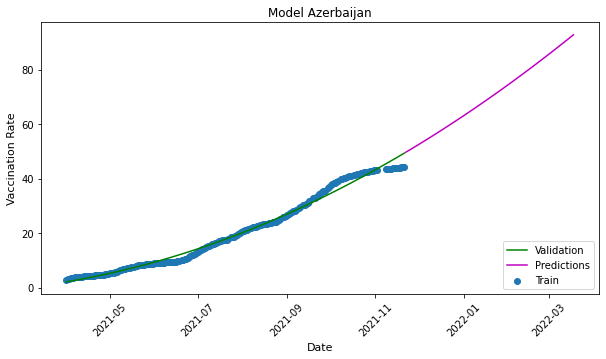

Observations in Actual Data = 215.000000, Predicted Observations=117.000000

 ------------- ('BDI', 'Africa', 'Burundi') --------------

 ------------- ('BEL', 'Europe', 'Belgium') --------------
('BEL', 'Europe', 'Belgium')
rmse:  7.968646788321573
r2:  0.9302017038660337
('BEL', 'Europe', 'Belgium')
rmse:  7.968646788321573
r2:  0.9302017038660337
('BEL', 'Europe', 'Belgium')
rmse:  7.968646788321573
r2:  0.9302017038660337
('BEL', 'Europe', 'Belgium')
rmse:  7.968646788321573
r2:  0.9302017038660337


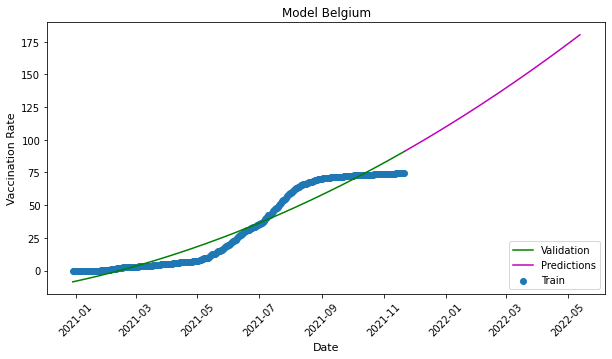

Observations in Actual Data = 328.000000, Predicted Observations=173.000000

 ------------- ('BEN', 'Africa', 'Benin') --------------

 ------------- ('BES', 'North America', 'Bonaire Sint Eustatius and Saba') --------------

 ------------- ('BFA', 'Africa', 'Burkina Faso') --------------

 ------------- ('BGD', 'Asia', 'Bangladesh') --------------
('BGD', 'Asia', 'Bangladesh')
rmse:  1.209164945244973
r2:  0.9509737611681814
('BGD', 'Asia', 'Bangladesh')
rmse:  1.209164945244973
r2:  0.9509737611681814
('BGD', 'Asia', 'Bangladesh')
rmse:  1.209164945244973
r2:  0.9509737611681814
('BGD', 'Asia', 'Bangladesh')
rmse:  1.209164945244973
r2:  0.9509737611681814


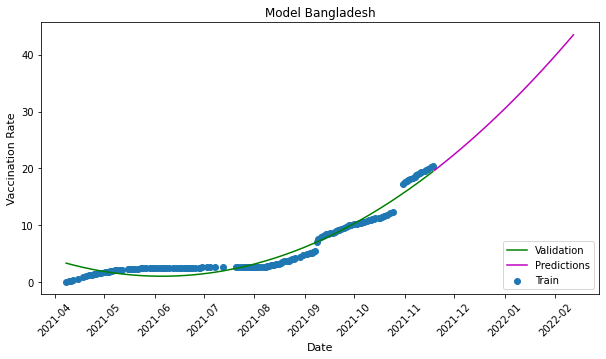

Observations in Actual Data = 154.000000, Predicted Observations=86.000000

 ------------- ('BGR', 'Europe', 'Bulgaria') --------------
('BGR', 'Europe', 'Bulgaria')
rmse:  1.1653552462294066
r2:  0.9793376406495258
('BGR', 'Europe', 'Bulgaria')
rmse:  1.1653552462294066
r2:  0.9793376406495258
('BGR', 'Europe', 'Bulgaria')
rmse:  1.1653552462294066
r2:  0.9793376406495258
('BGR', 'Europe', 'Bulgaria')
rmse:  1.1653552462294066
r2:  0.9793376406495258


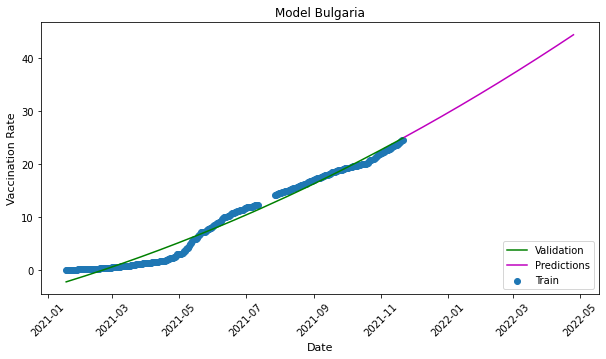

Observations in Actual Data = 292.000000, Predicted Observations=155.000000

 ------------- ('BHR', 'Asia', 'Bahrain') --------------
('BHR', 'Asia', 'Bahrain')
rmse:  1.9961576836968074
r2:  0.987812016533754
('BHR', 'Asia', 'Bahrain')
rmse:  1.9961576836968074
r2:  0.987812016533754
('BHR', 'Asia', 'Bahrain')
rmse:  1.9961576836968074
r2:  0.987812016533754
('BHR', 'Asia', 'Bahrain')
rmse:  1.9961576836968074
r2:  0.987812016533754


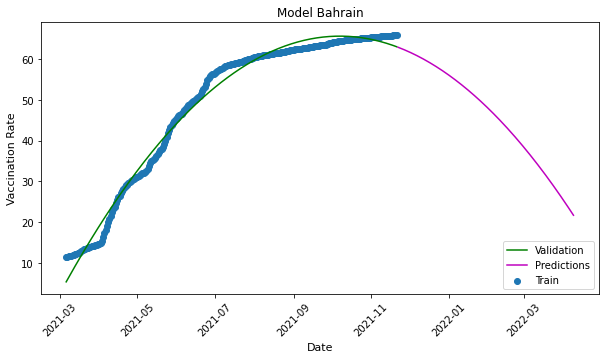

Observations in Actual Data = 261.000000, Predicted Observations=139.000000

 ------------- ('BHS', 'North America', 'Bahamas') --------------

 ------------- ('BIH', 'Europe', 'Bosnia and Herzegovina') --------------

 ------------- ('BLR', 'Europe', 'Belarus') --------------

 ------------- ('BLZ', 'North America', 'Belize') --------------
('BLZ', 'North America', 'Belize')
rmse:  1.4780675479416299
r2:  0.9794287924707116
('BLZ', 'North America', 'Belize')
rmse:  1.4780675479416299
r2:  0.9794287924707116
('BLZ', 'North America', 'Belize')
rmse:  1.4780675479416299
r2:  0.9794287924707116
('BLZ', 'North America', 'Belize')
rmse:  1.4780675479416299
r2:  0.9794287924707116


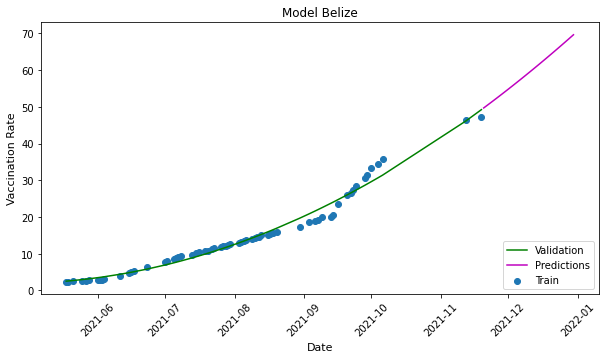

Observations in Actual Data = 65.000000, Predicted Observations=41.000000

 ------------- ('BMU', 'North America', 'Bermuda') --------------

 ------------- ('BOL', 'South America', 'Bolivia') --------------
('BOL', 'South America', 'Bolivia')
rmse:  1.613843981649402
r2:  0.9752306657638528
('BOL', 'South America', 'Bolivia')
rmse:  1.613843981649402
r2:  0.9752306657638528
('BOL', 'South America', 'Bolivia')
rmse:  1.613843981649402
r2:  0.9752306657638528
('BOL', 'South America', 'Bolivia')
rmse:  1.613843981649402
r2:  0.9752306657638528


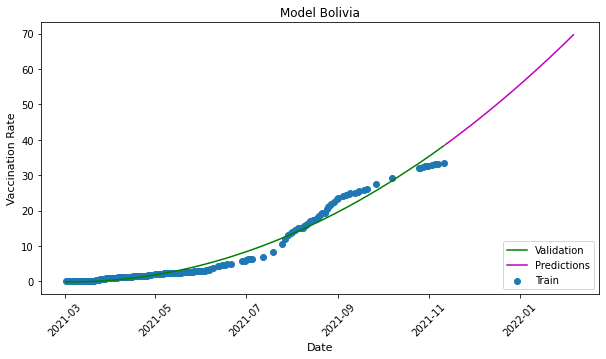

Observations in Actual Data = 156.000000, Predicted Observations=87.000000

 ------------- ('BRA', 'South America', 'Brazil') --------------
('BRA', 'South America', 'Brazil')
rmse:  1.5144110861657711
r2:  0.9918728333326335
('BRA', 'South America', 'Brazil')
rmse:  1.5144110861657711
r2:  0.9918728333326335
('BRA', 'South America', 'Brazil')
rmse:  1.5144110861657711
r2:  0.9918728333326335
('BRA', 'South America', 'Brazil')
rmse:  1.5144110861657711
r2:  0.9918728333326335


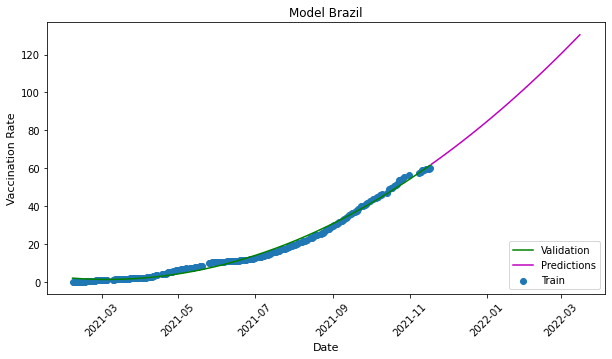

Observations in Actual Data = 221.000000, Predicted Observations=119.000000

 ------------- ('BRB', 'North America', 'Barbados') --------------
('BRB', 'North America', 'Barbados')
rmse:  1.7873633622208591
r2:  0.9670446697486818
('BRB', 'North America', 'Barbados')
rmse:  1.7873633622208591
r2:  0.9670446697486818
('BRB', 'North America', 'Barbados')
rmse:  1.7873633622208591
r2:  0.9670446697486818
('BRB', 'North America', 'Barbados')
rmse:  1.7873633622208591
r2:  0.9670446697486818


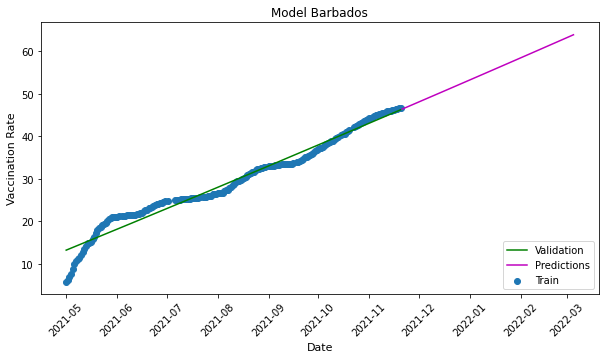

Observations in Actual Data = 192.000000, Predicted Observations=105.000000

 ------------- ('BRN', 'Asia', 'Brunei') --------------
('BRN', 'Asia', 'Brunei')
rmse:  2.559321879613755
r2:  0.9898194839236603
('BRN', 'Asia', 'Brunei')
rmse:  2.559321879613755
r2:  0.9898194839236603
('BRN', 'Asia', 'Brunei')
rmse:  2.559321879613755
r2:  0.9898194839236603
('BRN', 'Asia', 'Brunei')
rmse:  2.559321879613755
r2:  0.9898194839236603


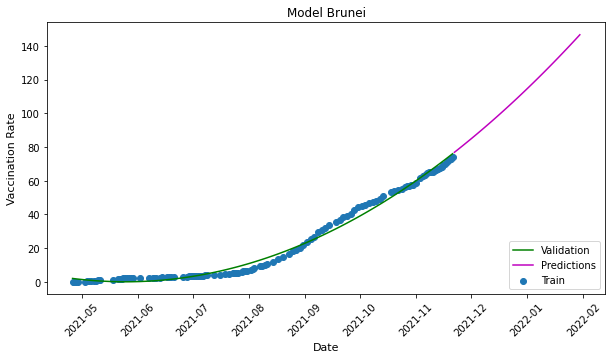

Observations in Actual Data = 122.000000, Predicted Observations=70.000000

 ------------- ('BTN', 'Asia', 'Bhutan') --------------

 ------------- ('BWA', 'Africa', 'Botswana') --------------

 ------------- ('CAF', 'Africa', 'Central African Republic') --------------

 ------------- ('CAN', 'North America', 'Canada') --------------
('CAN', 'North America', 'Canada')
rmse:  9.694091496175844
r2:  0.9043633438714153
('CAN', 'North America', 'Canada')
rmse:  9.694091496175844
r2:  0.9043633438714153
('CAN', 'North America', 'Canada')
rmse:  9.694091496175844
r2:  0.9043633438714153
('CAN', 'North America', 'Canada')
rmse:  9.694091496175844
r2:  0.9043633438714153


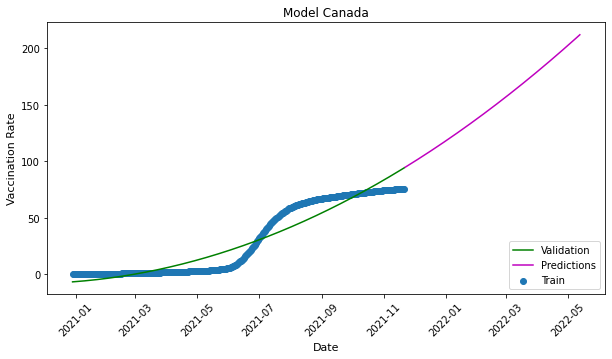

Observations in Actual Data = 328.000000, Predicted Observations=173.000000

 ------------- ('CHE', 'Europe', 'Switzerland') --------------
('CHE', 'Europe', 'Switzerland')
rmse:  5.071552789494512
r2:  0.9564388163883749
('CHE', 'Europe', 'Switzerland')
rmse:  5.071552789494512
r2:  0.9564388163883749
('CHE', 'Europe', 'Switzerland')
rmse:  5.071552789494512
r2:  0.9564388163883749
('CHE', 'Europe', 'Switzerland')
rmse:  5.071552789494512
r2:  0.9564388163883749


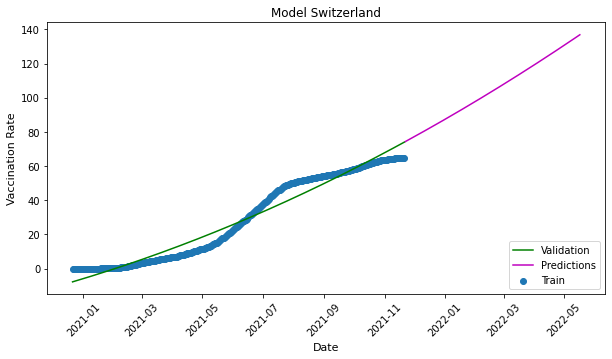

Observations in Actual Data = 336.000000, Predicted Observations=177.000000

 ------------- ('CHL', 'South America', 'Chile') --------------
('CHL', 'South America', 'Chile')
rmse:  3.545216854545706
r2:  0.9842132239326665
('CHL', 'South America', 'Chile')
rmse:  3.545216854545706
r2:  0.9842132239326665
('CHL', 'South America', 'Chile')
rmse:  3.545216854545706
r2:  0.9842132239326665
('CHL', 'South America', 'Chile')
rmse:  3.545216854545706
r2:  0.9842132239326665


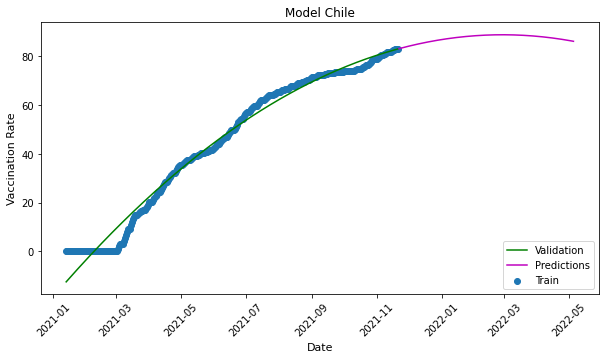

Observations in Actual Data = 313.000000, Predicted Observations=165.000000

 ------------- ('CHN', 'Asia', 'China') --------------

 ------------- ('CIV', 'Africa', "Cote d'Ivoire") --------------

 ------------- ('CMR', 'Africa', 'Cameroon') --------------

 ------------- ('COD', 'Africa', 'Democratic Republic of Congo') --------------

 ------------- ('COG', 'Africa', 'Congo') --------------

 ------------- ('COK', 'Oceania', 'Cook Islands') --------------

 ------------- ('COL', 'South America', 'Colombia') --------------
('COL', 'South America', 'Colombia')
rmse:  1.871429639676104
r2:  0.9842247499741867
('COL', 'South America', 'Colombia')
rmse:  1.871429639676104
r2:  0.9842247499741867
('COL', 'South America', 'Colombia')
rmse:  1.871429639676104
r2:  0.9842247499741867
('COL', 'South America', 'Colombia')
rmse:  1.871429639676104
r2:  0.9842247499741867


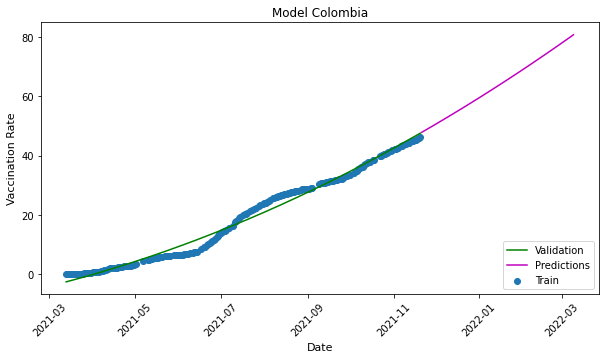

Observations in Actual Data = 200.000000, Predicted Observations=109.000000

 ------------- ('COM', 'Africa', 'Comoros') --------------

 ------------- ('CPV', 'Africa', 'Cape Verde') --------------

 ------------- ('CRI', 'North America', 'Costa Rica') --------------

 ------------- ('CUB', 'North America', 'Cuba') --------------
('CUB', 'North America', 'Cuba')
rmse:  1.9304763740967086
r2:  0.9924667610964644
('CUB', 'North America', 'Cuba')
rmse:  1.9304763740967086
r2:  0.9924667610964644
('CUB', 'North America', 'Cuba')
rmse:  1.9304763740967086
r2:  0.9924667610964644
('CUB', 'North America', 'Cuba')
rmse:  1.9304763740967086
r2:  0.9924667610964644


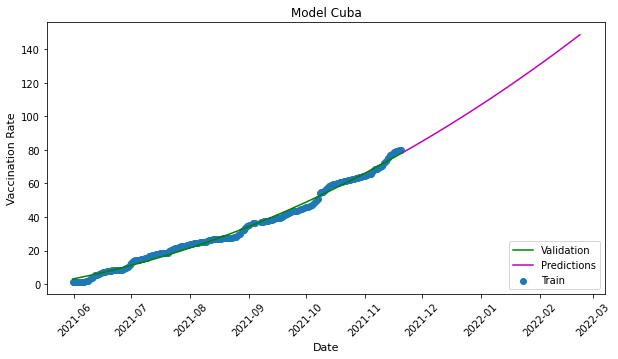

Observations in Actual Data = 170.000000, Predicted Observations=94.000000

 ------------- ('CUW', 'North America', 'Curacao') --------------
('CUW', 'North America', 'Curacao')
rmse:  4.086126126939669
r2:  0.9394929032149915
('CUW', 'North America', 'Curacao')
rmse:  4.086126126939669
r2:  0.9394929032149915
('CUW', 'North America', 'Curacao')
rmse:  4.086126126939669
r2:  0.9394929032149915
('CUW', 'North America', 'Curacao')
rmse:  4.086126126939669
r2:  0.9394929032149915


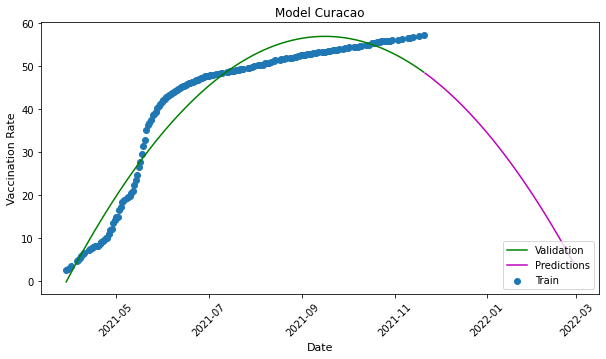

Observations in Actual Data = 180.000000, Predicted Observations=99.000000

 ------------- ('CYM', 'North America', 'Cayman Islands') --------------
('CYM', 'North America', 'Cayman Islands')
rmse:  2.550894396059447
r2:  0.9883863971567199
('CYM', 'North America', 'Cayman Islands')
rmse:  2.550894396059447
r2:  0.9883863971567199
('CYM', 'North America', 'Cayman Islands')
rmse:  2.550894396059447
r2:  0.9883863971567199
('CYM', 'North America', 'Cayman Islands')
rmse:  2.550894396059447
r2:  0.9883863971567199


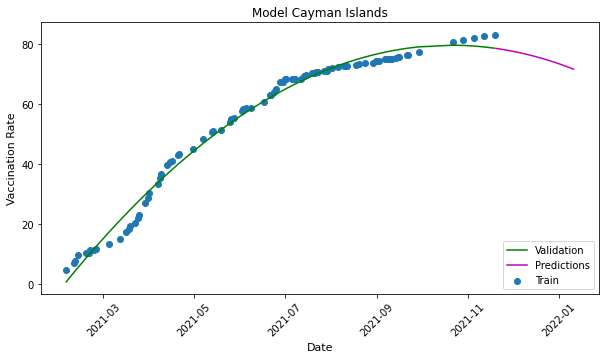

Observations in Actual Data = 88.000000, Predicted Observations=53.000000

 ------------- ('CYP', 'Europe', 'Cyprus') --------------
('CYP', 'Europe', 'Cyprus')
rmse:  5.94207194705337
r2:  0.9225288412204791
('CYP', 'Europe', 'Cyprus')
rmse:  5.94207194705337
r2:  0.9225288412204791
('CYP', 'Europe', 'Cyprus')
rmse:  5.94207194705337
r2:  0.9225288412204791
('CYP', 'Europe', 'Cyprus')
rmse:  5.94207194705337
r2:  0.9225288412204791


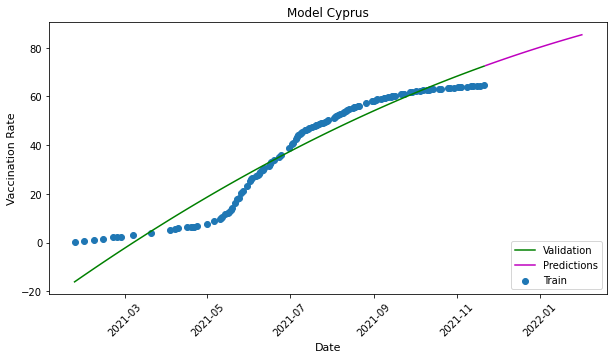

Observations in Actual Data = 126.000000, Predicted Observations=72.000000

 ------------- ('CZE', 'Europe', 'Czechia') --------------
('CZE', 'Europe', 'Czechia')
rmse:  5.677562707410851
r2:  0.9379609369984837
('CZE', 'Europe', 'Czechia')
rmse:  5.677562707410851
r2:  0.9379609369984837
('CZE', 'Europe', 'Czechia')
rmse:  5.677562707410851
r2:  0.9379609369984837
('CZE', 'Europe', 'Czechia')
rmse:  5.677562707410851
r2:  0.9379609369984837


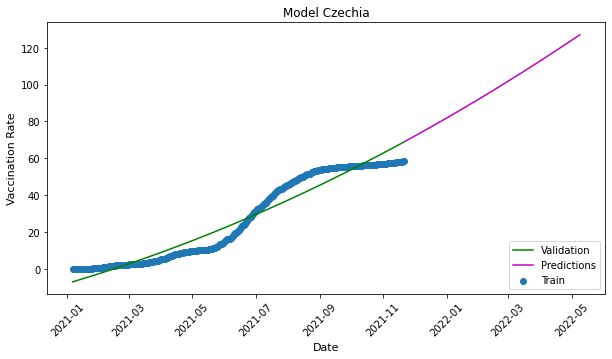

Observations in Actual Data = 320.000000, Predicted Observations=169.000000

 ------------- ('DEU', 'Europe', 'Germany') --------------
('DEU', 'Europe', 'Germany')
rmse:  6.556412705440479
r2:  0.9388851281001296
('DEU', 'Europe', 'Germany')
rmse:  6.556412705440479
r2:  0.9388851281001296
('DEU', 'Europe', 'Germany')
rmse:  6.556412705440479
r2:  0.9388851281001296
('DEU', 'Europe', 'Germany')
rmse:  6.556412705440479
r2:  0.9388851281001296


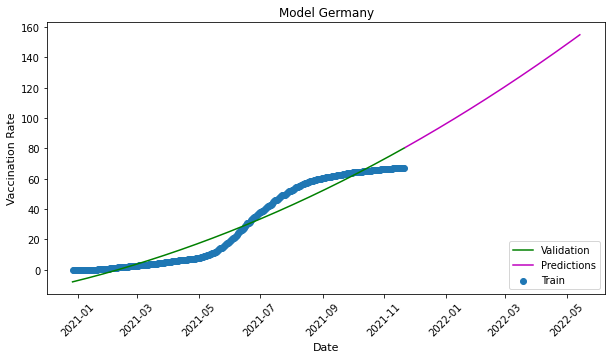

Observations in Actual Data = 330.000000, Predicted Observations=174.000000

 ------------- ('DJI', 'Africa', 'Djibouti') --------------

 ------------- ('DMA', 'North America', 'Dominica') --------------

 ------------- ('DNK', 'Europe', 'Denmark') --------------
('DNK', 'Europe', 'Denmark')
rmse:  7.040879463665506
r2:  0.9452927274608931
('DNK', 'Europe', 'Denmark')
rmse:  7.040879463665506
r2:  0.9452927274608931
('DNK', 'Europe', 'Denmark')
rmse:  7.040879463665506
r2:  0.9452927274608931
('DNK', 'Europe', 'Denmark')
rmse:  7.040879463665506
r2:  0.9452927274608931


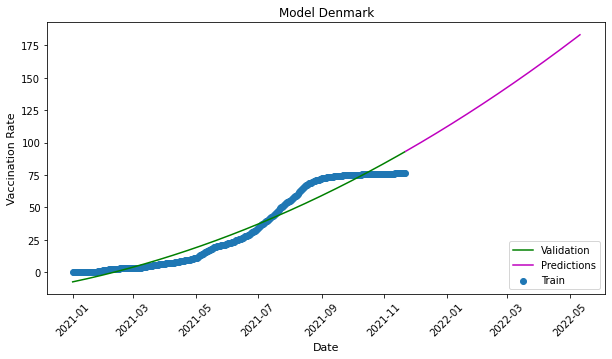

Observations in Actual Data = 325.000000, Predicted Observations=171.000000

 ------------- ('DOM', 'North America', 'Dominican Republic') --------------
('DOM', 'North America', 'Dominican Republic')
rmse:  2.721643121806932
r2:  0.9677227085277559
('DOM', 'North America', 'Dominican Republic')
rmse:  2.721643121806932
r2:  0.9677227085277559
('DOM', 'North America', 'Dominican Republic')
rmse:  2.721643121806932
r2:  0.9677227085277559
('DOM', 'North America', 'Dominican Republic')
rmse:  2.721643121806932
r2:  0.9677227085277559


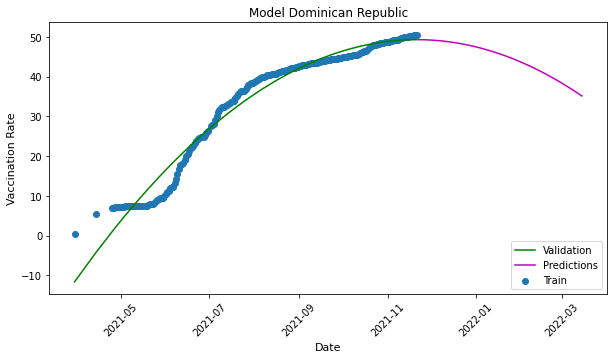

Observations in Actual Data = 210.000000, Predicted Observations=114.000000

 ------------- ('DZA', 'Africa', 'Algeria') --------------

 ------------- ('ECU', 'South America', 'Ecuador') --------------
('ECU', 'South America', 'Ecuador')
rmse:  5.908774195510161
r2:  0.9351067652358406
('ECU', 'South America', 'Ecuador')
rmse:  5.908774195510161
r2:  0.9351067652358406
('ECU', 'South America', 'Ecuador')
rmse:  5.908774195510161
r2:  0.9351067652358406
('ECU', 'South America', 'Ecuador')
rmse:  5.908774195510161
r2:  0.9351067652358406


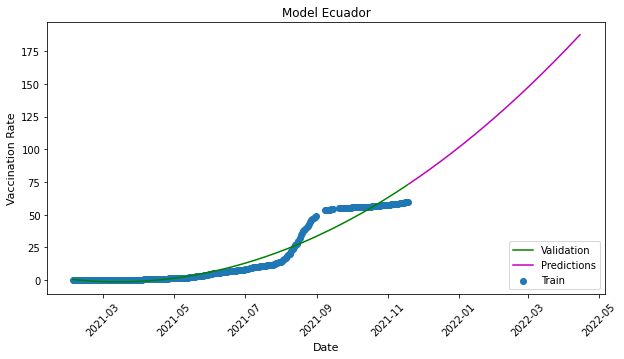

Observations in Actual Data = 278.000000, Predicted Observations=148.000000

 ------------- ('EGY', 'Africa', 'Egypt') --------------

 ------------- ('ERI', 'Africa', 'Eritrea') --------------

 ------------- ('ESP', 'Europe', 'Spain') --------------
('ESP', 'Europe', 'Spain')
rmse:  6.985785305465231
r2:  0.9496128012714093
('ESP', 'Europe', 'Spain')
rmse:  6.985785305465231
r2:  0.9496128012714093
('ESP', 'Europe', 'Spain')
rmse:  6.985785305465231
r2:  0.9496128012714093
('ESP', 'Europe', 'Spain')
rmse:  6.985785305465231
r2:  0.9496128012714093


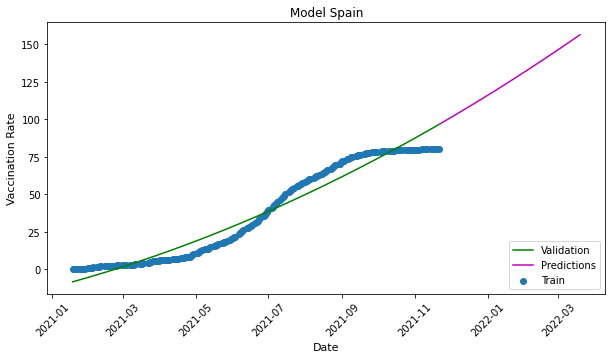

Observations in Actual Data = 218.000000, Predicted Observations=118.000000

 ------------- ('EST', 'Europe', 'Estonia') --------------
('EST', 'Europe', 'Estonia')
rmse:  4.126814316316437
r2:  0.9639731709685777
('EST', 'Europe', 'Estonia')
rmse:  4.126814316316437
r2:  0.9639731709685777
('EST', 'Europe', 'Estonia')
rmse:  4.126814316316437
r2:  0.9639731709685777
('EST', 'Europe', 'Estonia')
rmse:  4.126814316316437
r2:  0.9639731709685777


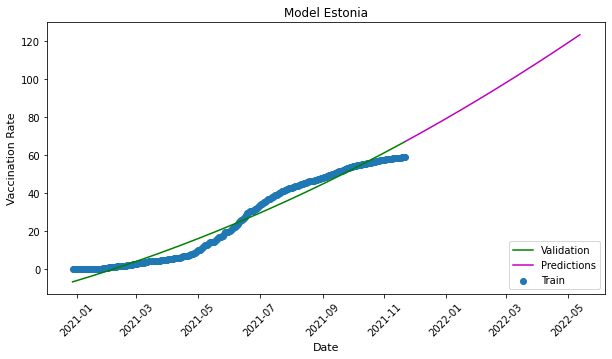

Observations in Actual Data = 329.000000, Predicted Observations=173.000000

 ------------- ('ETH', 'Africa', 'Ethiopia') --------------
('ETH', 'Africa', 'Ethiopia')
rmse:  0.04025635887238471
r2:  0.97263808345627
('ETH', 'Africa', 'Ethiopia')
rmse:  0.04025635887238471
r2:  0.97263808345627
('ETH', 'Africa', 'Ethiopia')
rmse:  0.04025635887238471
r2:  0.97263808345627
('ETH', 'Africa', 'Ethiopia')
rmse:  0.04025635887238471
r2:  0.97263808345627


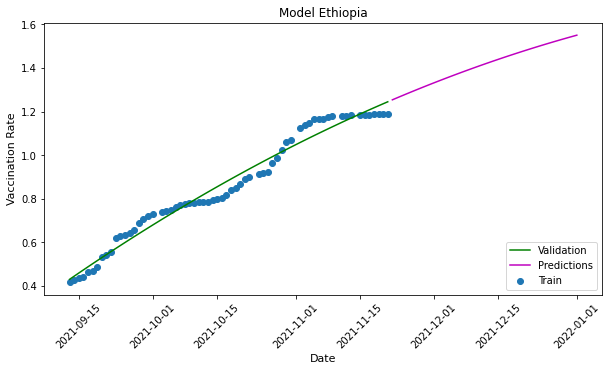

Observations in Actual Data = 65.000000, Predicted Observations=41.000000

 ------------- ('FIN', 'Europe', 'Finland') --------------
('FIN', 'Europe', 'Finland')
rmse:  4.256182650470096
r2:  0.9742813028693872
('FIN', 'Europe', 'Finland')
rmse:  4.256182650470096
r2:  0.9742813028693872
('FIN', 'Europe', 'Finland')
rmse:  4.256182650470096
r2:  0.9742813028693872
('FIN', 'Europe', 'Finland')
rmse:  4.256182650470096
r2:  0.9742813028693872


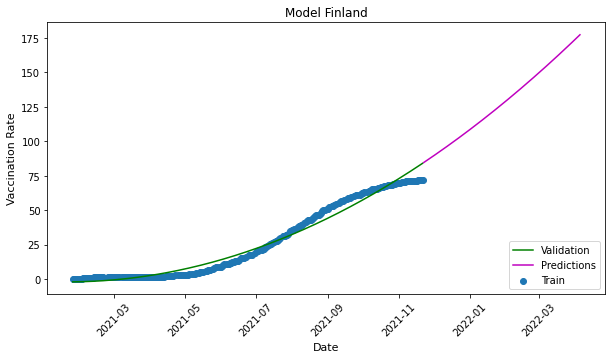

Observations in Actual Data = 253.000000, Predicted Observations=135.000000

 ------------- ('FJI', 'Oceania', 'Fiji') --------------

 ------------- ('FLK', 'South America', 'Falkland Islands') --------------

 ------------- ('FRA', 'Europe', 'France') --------------
('FRA', 'Europe', 'France')
rmse:  5.408255141628385
r2:  0.9579165253688797
('FRA', 'Europe', 'France')
rmse:  5.408255141628385
r2:  0.9579165253688797
('FRA', 'Europe', 'France')
rmse:  5.408255141628385
r2:  0.9579165253688797
('FRA', 'Europe', 'France')
rmse:  5.408255141628385
r2:  0.9579165253688797


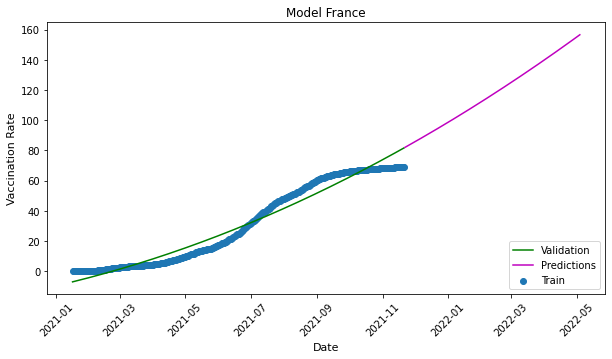

Observations in Actual Data = 310.000000, Predicted Observations=164.000000

 ------------- ('FRO', 'Europe', 'Faeroe Islands') --------------
('FRO', 'Europe', 'Faeroe Islands')
rmse:  6.3953713130289795
r2:  0.9443201085237836
('FRO', 'Europe', 'Faeroe Islands')
rmse:  6.3953713130289795
r2:  0.9443201085237836
('FRO', 'Europe', 'Faeroe Islands')
rmse:  6.3953713130289795
r2:  0.9443201085237836
('FRO', 'Europe', 'Faeroe Islands')
rmse:  6.3953713130289795
r2:  0.9443201085237836


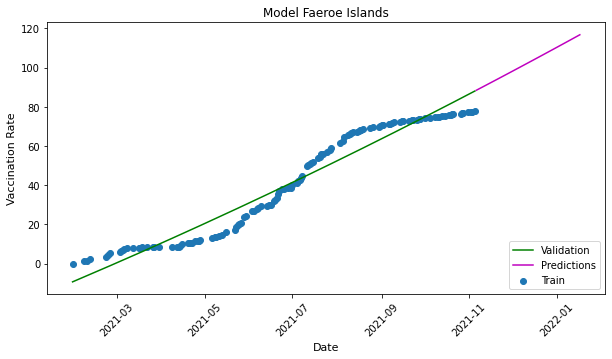

Observations in Actual Data = 129.000000, Predicted Observations=73.000000

 ------------- ('FSM', 'Oceania', 'Micronesia (country)') --------------

 ------------- ('GAB', 'Africa', 'Gabon') --------------

 ------------- ('GBR', 'Europe', 'United Kingdom') --------------
('GBR', 'Europe', 'United Kingdom')
rmse:  5.428431296751917
r2:  0.956791912442529
('GBR', 'Europe', 'United Kingdom')
rmse:  5.428431296751917
r2:  0.956791912442529
('GBR', 'Europe', 'United Kingdom')
rmse:  5.428431296751917
r2:  0.956791912442529
('GBR', 'Europe', 'United Kingdom')
rmse:  5.428431296751917
r2:  0.956791912442529


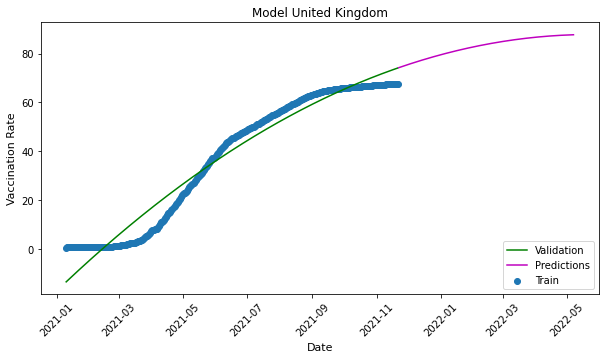

Observations in Actual Data = 316.000000, Predicted Observations=167.000000

 ------------- ('GEO', 'Asia', 'Georgia') --------------
('GEO', 'Asia', 'Georgia')
rmse:  1.8975691202794647
r2:  0.9522365336571291
('GEO', 'Asia', 'Georgia')
rmse:  1.8975691202794647
r2:  0.9522365336571291
('GEO', 'Asia', 'Georgia')
rmse:  1.8975691202794647
r2:  0.9522365336571291
('GEO', 'Asia', 'Georgia')
rmse:  1.8975691202794647
r2:  0.9522365336571291


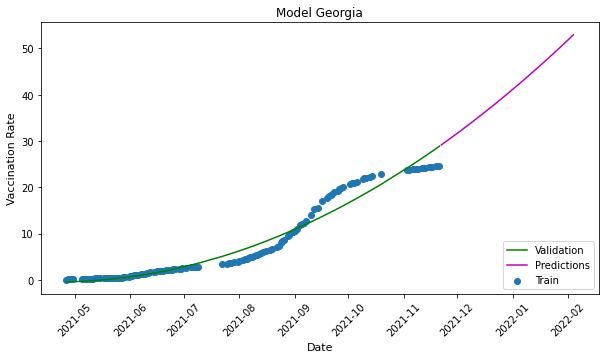

Observations in Actual Data = 133.000000, Predicted Observations=75.000000

 ------------- ('GGY', 'Europe', 'Guernsey') --------------

 ------------- ('GHA', 'Africa', 'Ghana') --------------

 ------------- ('GIB', 'Europe', 'Gibraltar') --------------
('GIB', 'Europe', 'Gibraltar')
rmse:  7.311568169025214
r2:  0.9590309283540713
('GIB', 'Europe', 'Gibraltar')
rmse:  7.311568169025214
r2:  0.9590309283540713
('GIB', 'Europe', 'Gibraltar')
rmse:  7.311568169025214
r2:  0.9590309283540713
('GIB', 'Europe', 'Gibraltar')
rmse:  7.311568169025214
r2:  0.9590309283540713


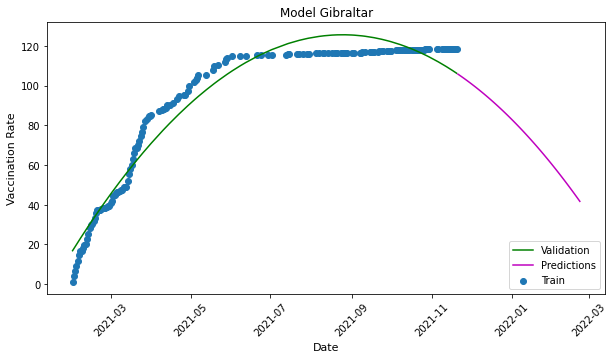

Observations in Actual Data = 170.000000, Predicted Observations=94.000000

 ------------- ('GIN', 'Africa', 'Guinea') --------------
('GIN', 'Africa', 'Guinea')
rmse:  0.17663112199138853
r2:  0.9887065331145187
('GIN', 'Africa', 'Guinea')
rmse:  0.17663112199138853
r2:  0.9887065331145187
('GIN', 'Africa', 'Guinea')
rmse:  0.17663112199138853
r2:  0.9887065331145187
('GIN', 'Africa', 'Guinea')
rmse:  0.17663112199138853
r2:  0.9887065331145187


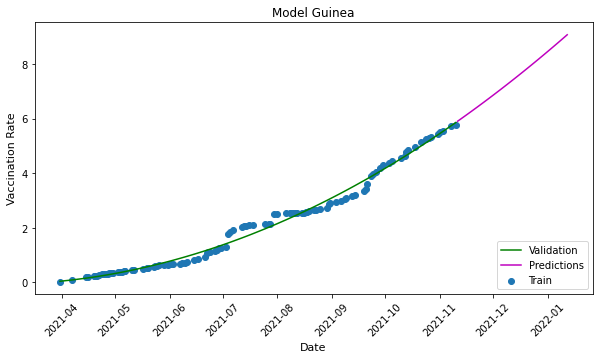

Observations in Actual Data = 108.000000, Predicted Observations=63.000000

 ------------- ('GMB', 'Africa', 'Gambia') --------------

 ------------- ('GNB', 'Africa', 'Guinea-Bissau') --------------

 ------------- ('GNQ', 'Africa', 'Equatorial Guinea') --------------
('GNQ', 'Africa', 'Equatorial Guinea')
rmse:  0.6002857767504883
r2:  0.9764721243752372
('GNQ', 'Africa', 'Equatorial Guinea')
rmse:  0.6002857767504883
r2:  0.9764721243752372
('GNQ', 'Africa', 'Equatorial Guinea')
rmse:  0.6002857767504883
r2:  0.9764721243752372
('GNQ', 'Africa', 'Equatorial Guinea')
rmse:  0.6002857767504883
r2:  0.9764721243752372


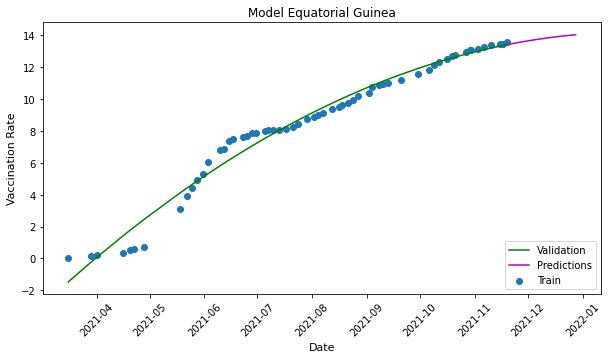

Observations in Actual Data = 60.000000, Predicted Observations=39.000000

 ------------- ('GRC', 'Europe', 'Greece') --------------
('GRC', 'Europe', 'Greece')
rmse:  5.29013056652347
r2:  0.9502576185634083
('GRC', 'Europe', 'Greece')
rmse:  5.29013056652347
r2:  0.9502576185634083
('GRC', 'Europe', 'Greece')
rmse:  5.29013056652347
r2:  0.9502576185634083
('GRC', 'Europe', 'Greece')
rmse:  5.29013056652347
r2:  0.9502576185634083


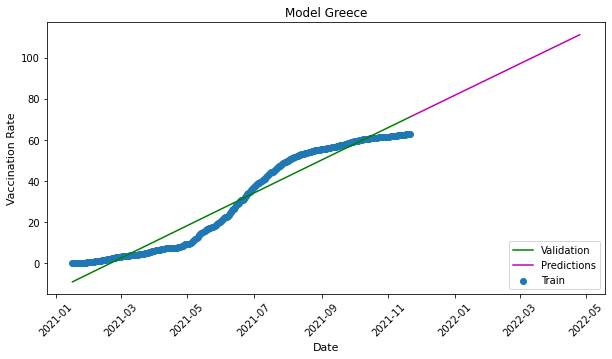

Observations in Actual Data = 291.000000, Predicted Observations=155.000000

 ------------- ('GRD', 'North America', 'Grenada') --------------

 ------------- ('GRL', 'North America', 'Greenland') --------------
('GRL', 'North America', 'Greenland')
rmse:  5.074384534256797
r2:  0.936213272654073
('GRL', 'North America', 'Greenland')
rmse:  5.074384534256797
r2:  0.936213272654073
('GRL', 'North America', 'Greenland')
rmse:  5.074384534256797
r2:  0.936213272654073
('GRL', 'North America', 'Greenland')
rmse:  5.074384534256797
r2:  0.936213272654073


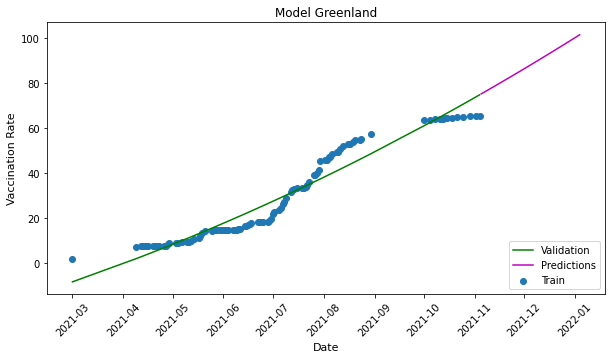

Observations in Actual Data = 105.000000, Predicted Observations=61.000000

 ------------- ('GTM', 'North America', 'Guatemala') --------------
('GTM', 'North America', 'Guatemala')
rmse:  1.036281540894469
r2:  0.9787000327169441
('GTM', 'North America', 'Guatemala')
rmse:  1.036281540894469
r2:  0.9787000327169441
('GTM', 'North America', 'Guatemala')
rmse:  1.036281540894469
r2:  0.9787000327169441
('GTM', 'North America', 'Guatemala')
rmse:  1.036281540894469
r2:  0.9787000327169441


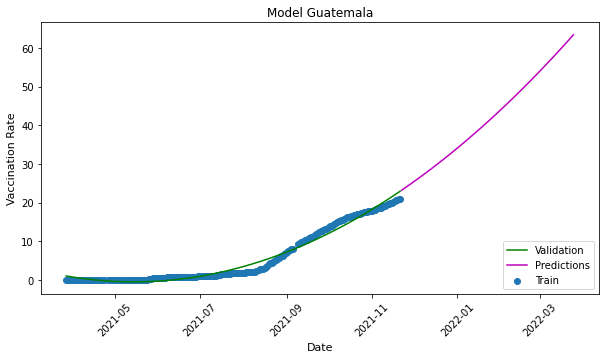

Observations in Actual Data = 230.000000, Predicted Observations=124.000000

 ------------- ('GUY', 'South America', 'Guyana') --------------
('GUY', 'South America', 'Guyana')
rmse:  1.1223350677482582
r2:  0.9836186968861352
('GUY', 'South America', 'Guyana')
rmse:  1.1223350677482582
r2:  0.9836186968861352
('GUY', 'South America', 'Guyana')
rmse:  1.1223350677482582
r2:  0.9836186968861352
('GUY', 'South America', 'Guyana')
rmse:  1.1223350677482582
r2:  0.9836186968861352


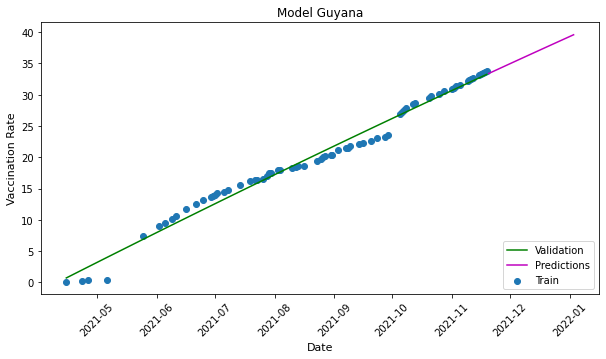

Observations in Actual Data = 71.000000, Predicted Observations=45.000000

 ------------- ('HKG', 'Asia', 'Hong Kong') --------------
('HKG', 'Asia', 'Hong Kong')
rmse:  3.177383861007239
r2:  0.9781691957046357
('HKG', 'Asia', 'Hong Kong')
rmse:  3.177383861007239
r2:  0.9781691957046357
('HKG', 'Asia', 'Hong Kong')
rmse:  3.177383861007239
r2:  0.9781691957046357
('HKG', 'Asia', 'Hong Kong')
rmse:  3.177383861007239
r2:  0.9781691957046357


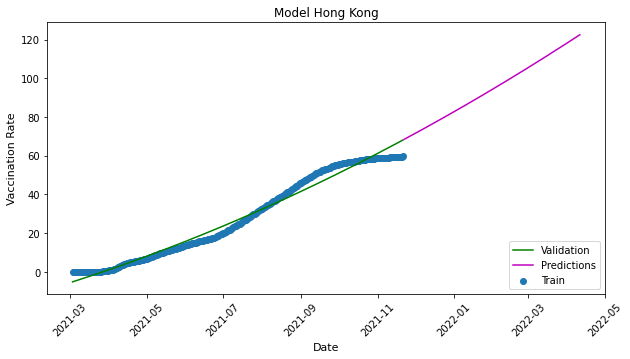

Observations in Actual Data = 264.000000, Predicted Observations=141.000000

 ------------- ('HND', 'North America', 'Honduras') --------------

 ------------- ('HRV', 'Europe', 'Croatia') --------------
('HRV', 'Europe', 'Croatia')
rmse:  4.7825571942127345
r2:  0.916945261216277
('HRV', 'Europe', 'Croatia')
rmse:  4.7825571942127345
r2:  0.916945261216277
('HRV', 'Europe', 'Croatia')
rmse:  4.7825571942127345
r2:  0.916945261216277
('HRV', 'Europe', 'Croatia')
rmse:  4.7825571942127345
r2:  0.916945261216277


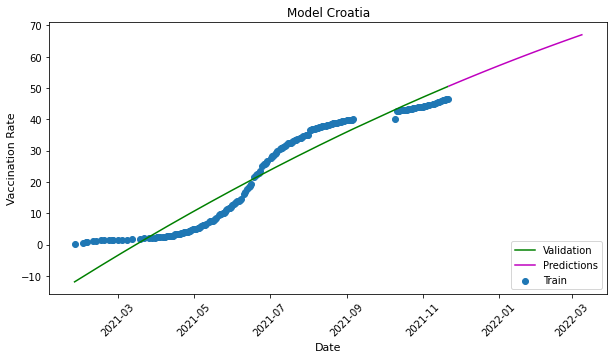

Observations in Actual Data = 198.000000, Predicted Observations=108.000000

 ------------- ('HTI', 'North America', 'Haiti') --------------

 ------------- ('HUN', 'Europe', 'Hungary') --------------
('HUN', 'Europe', 'Hungary')
rmse:  5.395116200353581
r2:  0.9487733343584884
('HUN', 'Europe', 'Hungary')
rmse:  5.395116200353581
r2:  0.9487733343584884
('HUN', 'Europe', 'Hungary')
rmse:  5.395116200353581
r2:  0.9487733343584884
('HUN', 'Europe', 'Hungary')
rmse:  5.395116200353581
r2:  0.9487733343584884


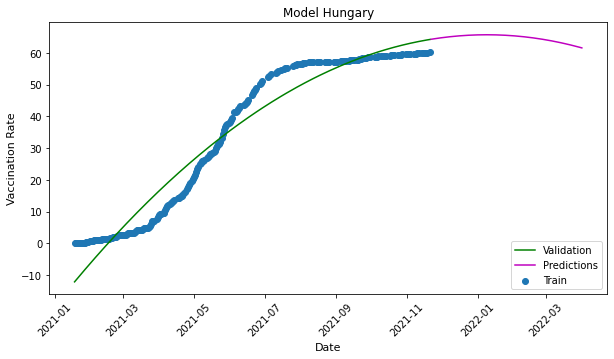

Observations in Actual Data = 243.000000, Predicted Observations=131.000000

 ------------- ('IDN', 'Asia', 'Indonesia') --------------
('IDN', 'Asia', 'Indonesia')
rmse:  1.0444672358896714
r2:  0.9872866667563976
('IDN', 'Asia', 'Indonesia')
rmse:  1.0444672358896714
r2:  0.9872866667563976
('IDN', 'Asia', 'Indonesia')
rmse:  1.0444672358896714
r2:  0.9872866667563976
('IDN', 'Asia', 'Indonesia')
rmse:  1.0444672358896714
r2:  0.9872866667563976


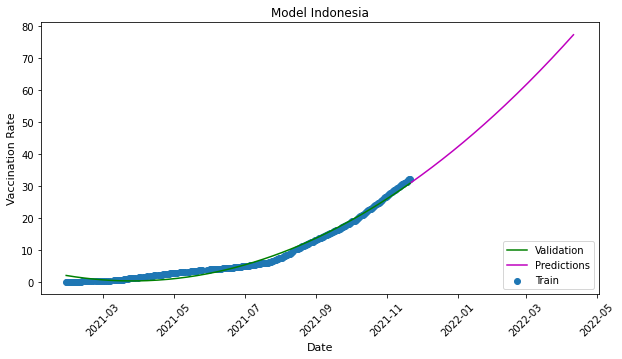

Observations in Actual Data = 263.000000, Predicted Observations=141.000000

 ------------- ('IMN', 'Europe', 'Isle of Man') --------------
('IMN', 'Europe', 'Isle of Man')
rmse:  6.729084685637408
r2:  0.9398261907042723
('IMN', 'Europe', 'Isle of Man')
rmse:  6.729084685637408
r2:  0.9398261907042723
('IMN', 'Europe', 'Isle of Man')
rmse:  6.729084685637408
r2:  0.9398261907042723
('IMN', 'Europe', 'Isle of Man')
rmse:  6.729084685637408
r2:  0.9398261907042723


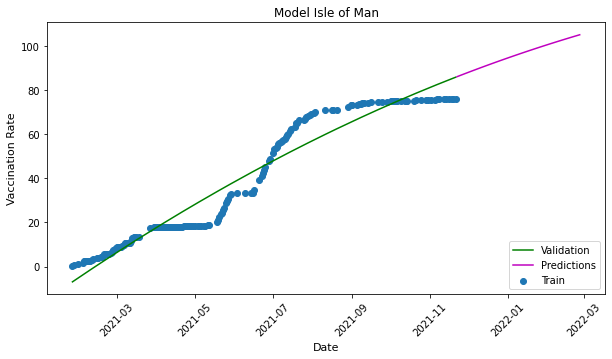

Observations in Actual Data = 175.000000, Predicted Observations=97.000000

 ------------- ('IND', 'Asia', 'India') --------------
('IND', 'Asia', 'India')
rmse:  0.7449862705191347
r2:  0.9917587348803348
('IND', 'Asia', 'India')
rmse:  0.7449862705191347
r2:  0.9917587348803348
('IND', 'Asia', 'India')
rmse:  0.7449862705191347
r2:  0.9917587348803348
('IND', 'Asia', 'India')
rmse:  0.7449862705191347
r2:  0.9917587348803348


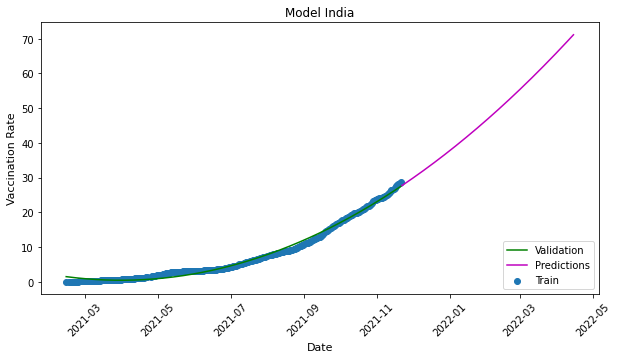

Observations in Actual Data = 271.000000, Predicted Observations=145.000000

 ------------- ('IRL', 'Europe', 'Ireland') --------------
('IRL', 'Europe', 'Ireland')
rmse:  7.269023813848249
r2:  0.9416666965909563
('IRL', 'Europe', 'Ireland')
rmse:  7.269023813848249
r2:  0.9416666965909563
('IRL', 'Europe', 'Ireland')
rmse:  7.269023813848249
r2:  0.9416666965909563
('IRL', 'Europe', 'Ireland')
rmse:  7.269023813848249
r2:  0.9416666965909563


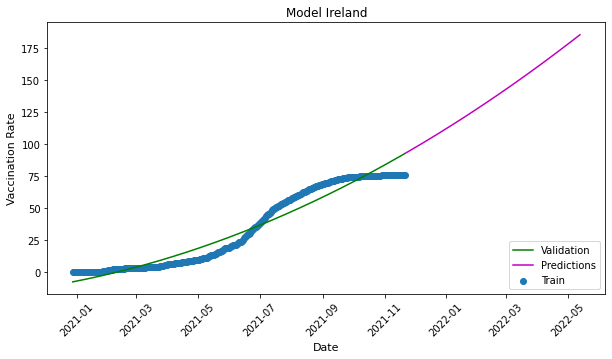

Observations in Actual Data = 327.000000, Predicted Observations=173.000000

 ------------- ('IRN', 'Asia', 'Iran') --------------

 ------------- ('IRQ', 'Asia', 'Iraq') --------------

 ------------- ('ISL', 'Europe', 'Iceland') --------------
('ISL', 'Europe', 'Iceland')
rmse:  9.459763268805082
r2:  0.9105633235546438
('ISL', 'Europe', 'Iceland')
rmse:  9.459763268805082
r2:  0.9105633235546438
('ISL', 'Europe', 'Iceland')
rmse:  9.459763268805082
r2:  0.9105633235546438
('ISL', 'Europe', 'Iceland')
rmse:  9.459763268805082
r2:  0.9105633235546438


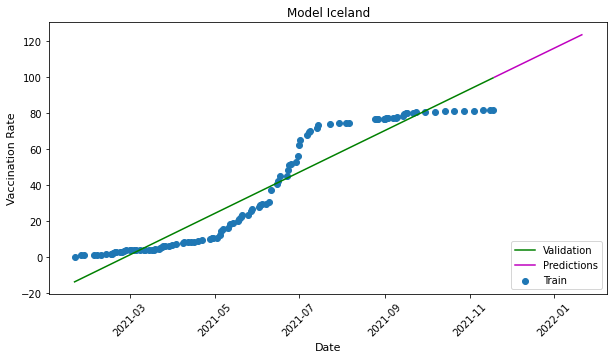

Observations in Actual Data = 110.000000, Predicted Observations=64.000000

 ------------- ('ISR', 'Asia', 'Israel') --------------
('ISR', 'Asia', 'Israel')
rmse:  5.377981929945203
r2:  0.9193536305630168
('ISR', 'Asia', 'Israel')
rmse:  5.377981929945203
r2:  0.9193536305630168
('ISR', 'Asia', 'Israel')
rmse:  5.377981929945203
r2:  0.9193536305630168
('ISR', 'Asia', 'Israel')
rmse:  5.377981929945203
r2:  0.9193536305630168


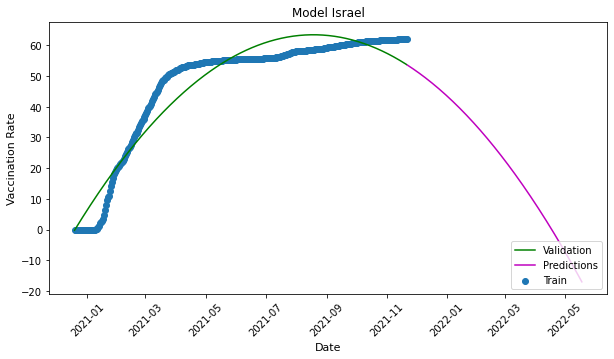

Observations in Actual Data = 338.000000, Predicted Observations=178.000000

 ------------- ('ITA', 'Europe', 'Italy') --------------
('ITA', 'Europe', 'Italy')
rmse:  5.536799192081524
r2:  0.95941134751606
('ITA', 'Europe', 'Italy')
rmse:  5.536799192081524
r2:  0.95941134751606
('ITA', 'Europe', 'Italy')
rmse:  5.536799192081524
r2:  0.95941134751606
('ITA', 'Europe', 'Italy')
rmse:  5.536799192081524
r2:  0.95941134751606


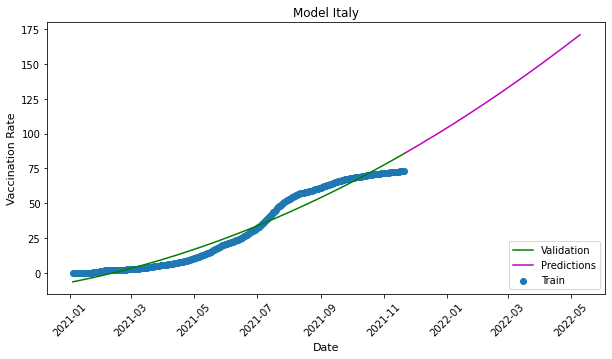

Observations in Actual Data = 322.000000, Predicted Observations=170.000000

 ------------- ('JAM', 'North America', 'Jamaica') --------------
('JAM', 'North America', 'Jamaica')
rmse:  0.6657828937828617
r2:  0.9812041501546057
('JAM', 'North America', 'Jamaica')
rmse:  0.6657828937828617
r2:  0.9812041501546057
('JAM', 'North America', 'Jamaica')
rmse:  0.6657828937828617
r2:  0.9812041501546057
('JAM', 'North America', 'Jamaica')
rmse:  0.6657828937828617
r2:  0.9812041501546057


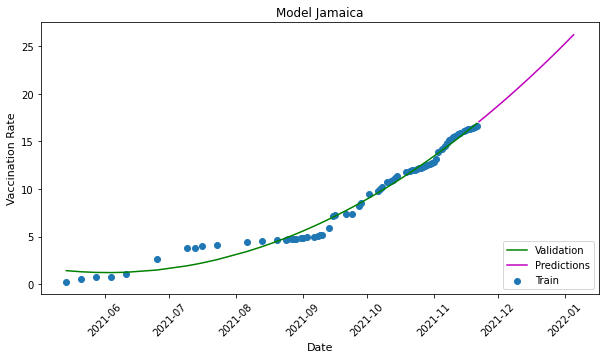

Observations in Actual Data = 72.000000, Predicted Observations=45.000000

 ------------- ('JEY', 'Europe', 'Jersey') --------------
('JEY', 'Europe', 'Jersey')
rmse:  1.5481955129317118
r2:  0.9928631746972125
('JEY', 'Europe', 'Jersey')
rmse:  1.5481955129317118
r2:  0.9928631746972125
('JEY', 'Europe', 'Jersey')
rmse:  1.5481955129317118
r2:  0.9928631746972125
('JEY', 'Europe', 'Jersey')
rmse:  1.5481955129317118
r2:  0.9928631746972125


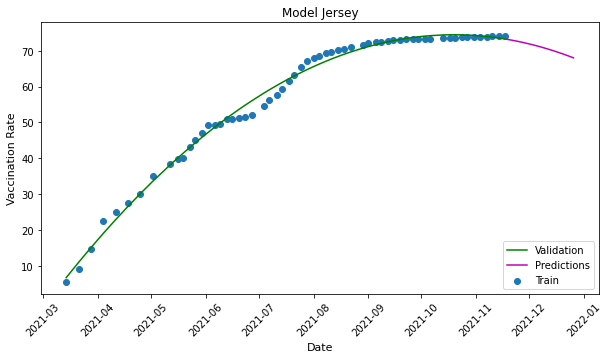

Observations in Actual Data = 60.000000, Predicted Observations=39.000000

 ------------- ('JOR', 'Asia', 'Jordan') --------------
('JOR', 'Asia', 'Jordan')
rmse:  2.5302081685203732
r2:  0.9476550298655287
('JOR', 'Asia', 'Jordan')
rmse:  2.5302081685203732
r2:  0.9476550298655287
('JOR', 'Asia', 'Jordan')
rmse:  2.5302081685203732
r2:  0.9476550298655287
('JOR', 'Asia', 'Jordan')
rmse:  2.5302081685203732
r2:  0.9476550298655287


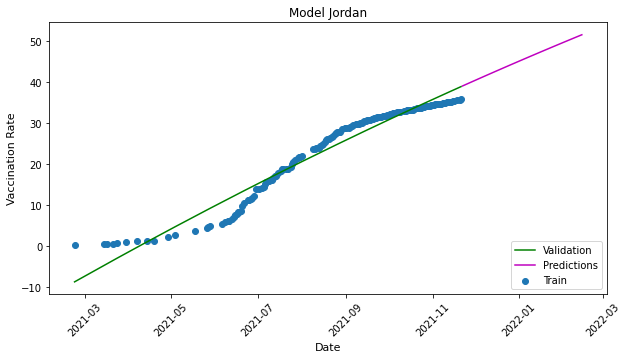

Observations in Actual Data = 153.000000, Predicted Observations=85.000000

 ------------- ('JPN', 'Asia', 'Japan') --------------
('JPN', 'Asia', 'Japan')
rmse:  3.59664680018204
r2:  0.9808914803109344
('JPN', 'Asia', 'Japan')
rmse:  3.59664680018204
r2:  0.9808914803109344
('JPN', 'Asia', 'Japan')
rmse:  3.59664680018204
r2:  0.9808914803109344
('JPN', 'Asia', 'Japan')
rmse:  3.59664680018204
r2:  0.9808914803109344


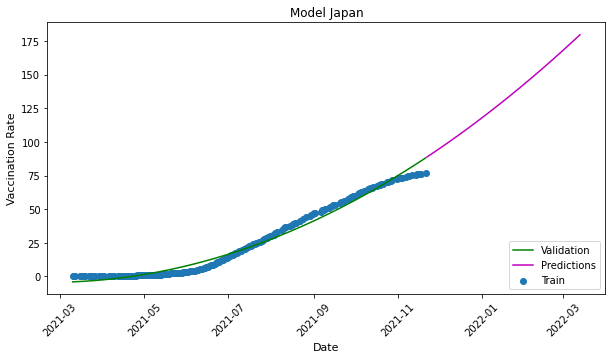

Observations in Actual Data = 206.000000, Predicted Observations=112.000000

 ------------- ('KAZ', 'Asia', 'Kazakhstan') --------------
('KAZ', 'Asia', 'Kazakhstan')
rmse:  2.0608640659266633
r2:  0.9767619715271955
('KAZ', 'Asia', 'Kazakhstan')
rmse:  2.0608640659266633
r2:  0.9767619715271955
('KAZ', 'Asia', 'Kazakhstan')
rmse:  2.0608640659266633
r2:  0.9767619715271955
('KAZ', 'Asia', 'Kazakhstan')
rmse:  2.0608640659266633
r2:  0.9767619715271955


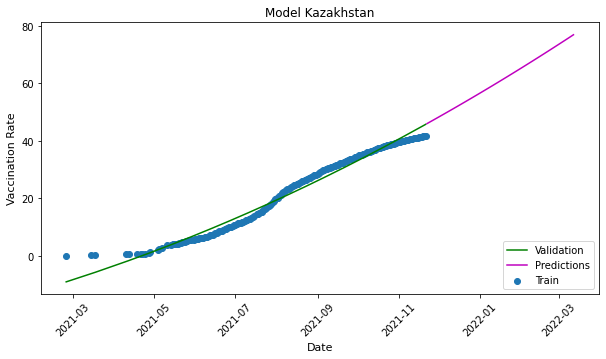

Observations in Actual Data = 204.000000, Predicted Observations=111.000000

 ------------- ('KEN', 'Africa', 'Kenya') --------------
('KEN', 'Africa', 'Kenya')
rmse:  0.2843831956784675
r2:  0.9122603192546022
('KEN', 'Africa', 'Kenya')
rmse:  0.2843831956784675
r2:  0.9122603192546022
('KEN', 'Africa', 'Kenya')
rmse:  0.2843831956784675
r2:  0.9122603192546022
('KEN', 'Africa', 'Kenya')
rmse:  0.2843831956784675
r2:  0.9122603192546022


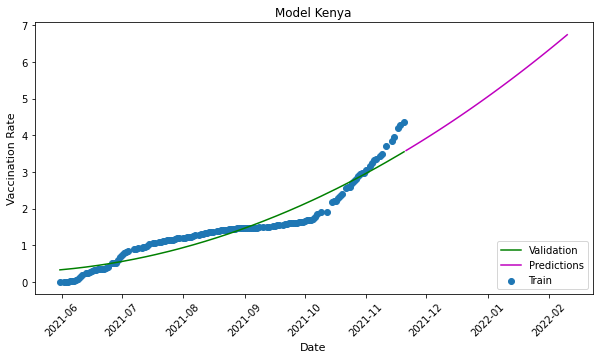

Observations in Actual Data = 146.000000, Predicted Observations=82.000000

 ------------- ('KGZ', 'Asia', 'Kyrgyzstan') --------------
('KGZ', 'Asia', 'Kyrgyzstan')
rmse:  0.8637571641278748
r2:  0.9396978390963028
('KGZ', 'Asia', 'Kyrgyzstan')
rmse:  0.8637571641278748
r2:  0.9396978390963028
('KGZ', 'Asia', 'Kyrgyzstan')
rmse:  0.8637571641278748
r2:  0.9396978390963028
('KGZ', 'Asia', 'Kyrgyzstan')
rmse:  0.8637571641278748
r2:  0.9396978390963028


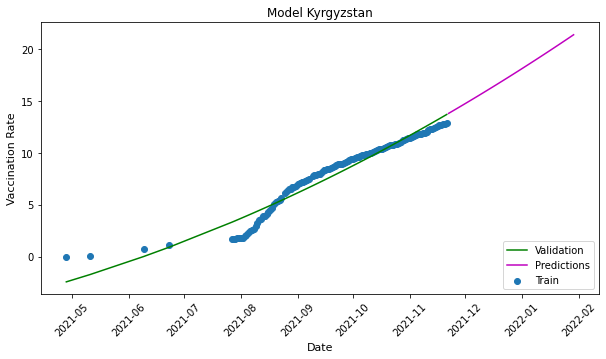

Observations in Actual Data = 120.000000, Predicted Observations=69.000000

 ------------- ('KHM', 'Asia', 'Cambodia') --------------
('KHM', 'Asia', 'Cambodia')
rmse:  3.627265858773287
r2:  0.983004435335742
('KHM', 'Asia', 'Cambodia')
rmse:  3.627265858773287
r2:  0.983004435335742
('KHM', 'Asia', 'Cambodia')
rmse:  3.627265858773287
r2:  0.983004435335742
('KHM', 'Asia', 'Cambodia')
rmse:  3.627265858773287
r2:  0.983004435335742


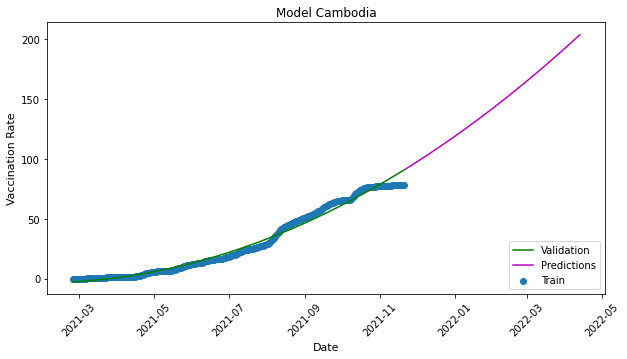

Observations in Actual Data = 267.000000, Predicted Observations=143.000000

 ------------- ('KIR', 'Oceania', 'Kiribati') --------------

 ------------- ('KNA', 'North America', 'Saint Kitts and Nevis') --------------

 ------------- ('KOR', 'Asia', 'South Korea') --------------
('KOR', 'Asia', 'South Korea')
rmse:  2.8986345385585595
r2:  0.9878675581957679
('KOR', 'Asia', 'South Korea')
rmse:  2.8986345385585595
r2:  0.9878675581957679
('KOR', 'Asia', 'South Korea')
rmse:  2.8986345385585595
r2:  0.9878675581957679
('KOR', 'Asia', 'South Korea')
rmse:  2.8986345385585595
r2:  0.9878675581957679


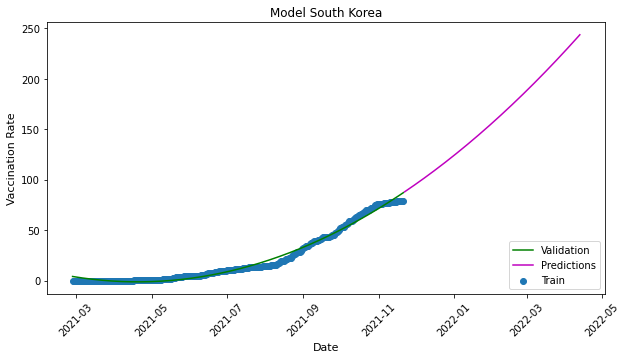

Observations in Actual Data = 269.000000, Predicted Observations=143.000000

 ------------- ('KWT', 'Asia', 'Kuwait') --------------

 ------------- ('LAO', 'Asia', 'Laos') --------------
('LAO', 'Asia', 'Laos')
rmse:  1.3948604260730806
r2:  0.9822837844961132
('LAO', 'Asia', 'Laos')
rmse:  1.3948604260730806
r2:  0.9822837844961132
('LAO', 'Asia', 'Laos')
rmse:  1.3948604260730806
r2:  0.9822837844961132
('LAO', 'Asia', 'Laos')
rmse:  1.3948604260730806
r2:  0.9822837844961132


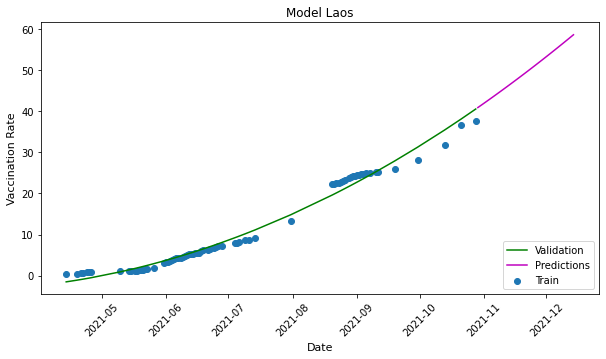

Observations in Actual Data = 75.000000, Predicted Observations=47.000000

 ------------- ('LBN', 'Asia', 'Lebanon') --------------
('LBN', 'Asia', 'Lebanon')
rmse:  1.0303306137120702
r2:  0.9827650294221207
('LBN', 'Asia', 'Lebanon')
rmse:  1.0303306137120702
r2:  0.9827650294221207
('LBN', 'Asia', 'Lebanon')
rmse:  1.0303306137120702
r2:  0.9827650294221207
('LBN', 'Asia', 'Lebanon')
rmse:  1.0303306137120702
r2:  0.9827650294221207


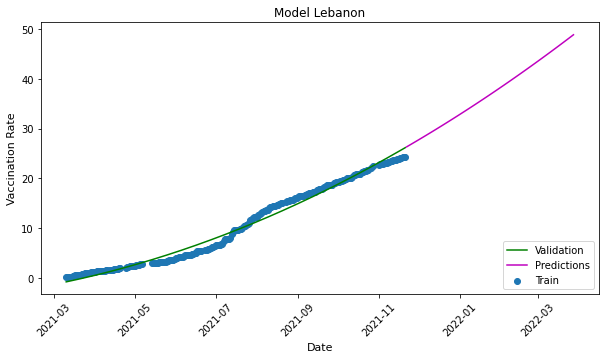

Observations in Actual Data = 235.000000, Predicted Observations=127.000000

 ------------- ('LBR', 'Africa', 'Liberia') --------------

 ------------- ('LBY', 'Africa', 'Libya') --------------

 ------------- ('LCA', 'North America', 'Saint Lucia') --------------
('LCA', 'North America', 'Saint Lucia')
rmse:  0.5082945384192129
r2:  0.985273526319225
('LCA', 'North America', 'Saint Lucia')
rmse:  0.5082945384192129
r2:  0.985273526319225
('LCA', 'North America', 'Saint Lucia')
rmse:  0.5082945384192129
r2:  0.985273526319225
('LCA', 'North America', 'Saint Lucia')
rmse:  0.5082945384192129
r2:  0.985273526319225


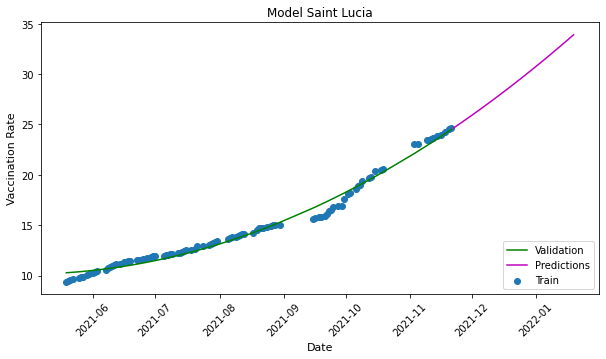

Observations in Actual Data = 101.000000, Predicted Observations=59.000000

 ------------- ('LIE', 'Europe', 'Liechtenstein') --------------
('LIE', 'Europe', 'Liechtenstein')
rmse:  4.409047406194049
r2:  0.9651894100485356
('LIE', 'Europe', 'Liechtenstein')
rmse:  4.409047406194049
r2:  0.9651894100485356
('LIE', 'Europe', 'Liechtenstein')
rmse:  4.409047406194049
r2:  0.9651894100485356
('LIE', 'Europe', 'Liechtenstein')
rmse:  4.409047406194049
r2:  0.9651894100485356


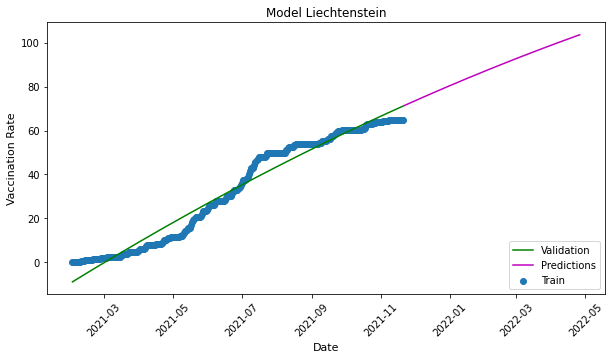

Observations in Actual Data = 294.000000, Predicted Observations=156.000000

 ------------- ('LKA', 'Asia', 'Sri Lanka') --------------
('LKA', 'Asia', 'Sri Lanka')
rmse:  6.369487408230658
r2:  0.9358197280011437
('LKA', 'Asia', 'Sri Lanka')
rmse:  6.369487408230658
r2:  0.9358197280011437
('LKA', 'Asia', 'Sri Lanka')
rmse:  6.369487408230658
r2:  0.9358197280011437
('LKA', 'Asia', 'Sri Lanka')
rmse:  6.369487408230658
r2:  0.9358197280011437


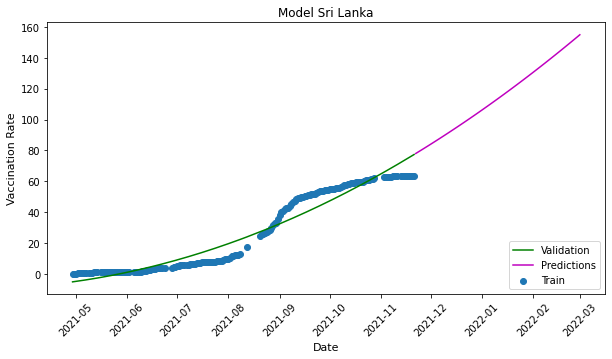

Observations in Actual Data = 182.000000, Predicted Observations=100.000000

 ------------- ('LSO', 'Africa', 'Lesotho') --------------

 ------------- ('LTU', 'Europe', 'Lithuania') --------------
('LTU', 'Europe', 'Lithuania')
rmse:  4.543699540653736
r2:  0.964486021530078
('LTU', 'Europe', 'Lithuania')
rmse:  4.543699540653736
r2:  0.964486021530078
('LTU', 'Europe', 'Lithuania')
rmse:  4.543699540653736
r2:  0.964486021530078
('LTU', 'Europe', 'Lithuania')
rmse:  4.543699540653736
r2:  0.964486021530078


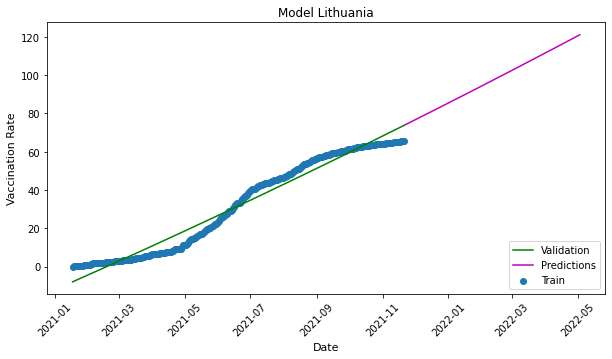

Observations in Actual Data = 309.000000, Predicted Observations=163.000000

 ------------- ('LUX', 'Europe', 'Luxembourg') --------------
('LUX', 'Europe', 'Luxembourg')
rmse:  0.25532966933165524
r2:  0.9988359261637474
('LUX', 'Europe', 'Luxembourg')
rmse:  0.25532966933165524
r2:  0.9988359261637474
('LUX', 'Europe', 'Luxembourg')
rmse:  0.25532966933165524
r2:  0.9988359261637474
('LUX', 'Europe', 'Luxembourg')
rmse:  0.25532966933165524
r2:  0.9988359261637474


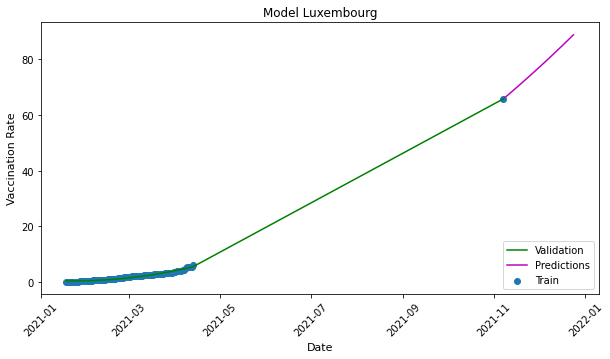

Observations in Actual Data = 75.000000, Predicted Observations=47.000000

 ------------- ('LVA', 'Europe', 'Latvia') --------------
('LVA', 'Europe', 'Latvia')
rmse:  4.363759831208915
r2:  0.9557576071592345
('LVA', 'Europe', 'Latvia')
rmse:  4.363759831208915
r2:  0.9557576071592345
('LVA', 'Europe', 'Latvia')
rmse:  4.363759831208915
r2:  0.9557576071592345
('LVA', 'Europe', 'Latvia')
rmse:  4.363759831208915
r2:  0.9557576071592345


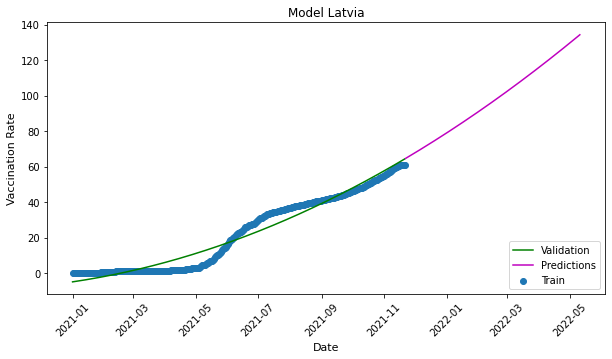

Observations in Actual Data = 325.000000, Predicted Observations=171.000000

 ------------- ('MAC', 'Asia', 'Macao') --------------
('MAC', 'Asia', 'Macao')
rmse:  3.137181947478144
r2:  0.9515819569573909
('MAC', 'Asia', 'Macao')
rmse:  3.137181947478144
r2:  0.9515819569573909
('MAC', 'Asia', 'Macao')
rmse:  3.137181947478144
r2:  0.9515819569573909
('MAC', 'Asia', 'Macao')
rmse:  3.137181947478144
r2:  0.9515819569573909


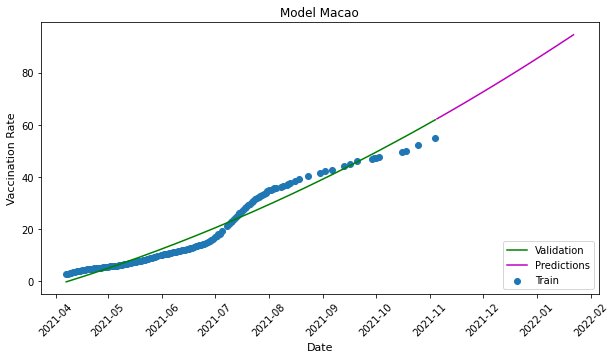

Observations in Actual Data = 140.000000, Predicted Observations=79.000000

 ------------- ('MAR', 'Africa', 'Morocco') --------------
('MAR', 'Africa', 'Morocco')
rmse:  2.1013791840379343
r2:  0.981672228401438
('MAR', 'Africa', 'Morocco')
rmse:  2.1013791840379343
r2:  0.981672228401438
('MAR', 'Africa', 'Morocco')
rmse:  2.1013791840379343
r2:  0.981672228401438
('MAR', 'Africa', 'Morocco')
rmse:  2.1013791840379343
r2:  0.981672228401438


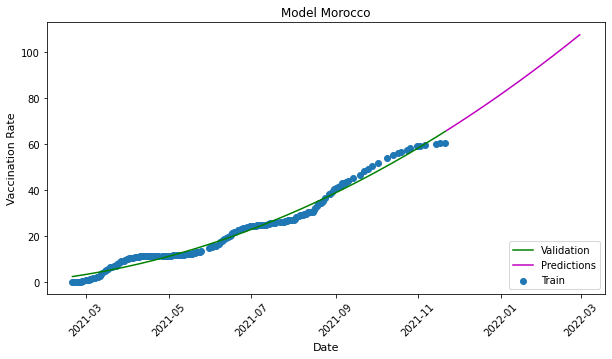

Observations in Actual Data = 181.000000, Predicted Observations=99.000000

 ------------- ('MCO', 'Europe', 'Monaco') --------------

 ------------- ('MDA', 'Europe', 'Moldova') --------------
('MDA', 'Europe', 'Moldova')
rmse:  1.0331653217096777
r2:  0.9851284513725368
('MDA', 'Europe', 'Moldova')
rmse:  1.0331653217096777
r2:  0.9851284513725368
('MDA', 'Europe', 'Moldova')
rmse:  1.0331653217096777
r2:  0.9851284513725368
('MDA', 'Europe', 'Moldova')
rmse:  1.0331653217096777
r2:  0.9851284513725368


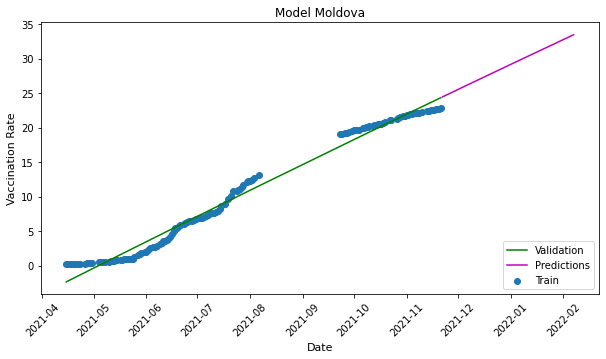

Observations in Actual Data = 138.000000, Predicted Observations=78.000000

 ------------- ('MDG', 'Africa', 'Madagascar') --------------

 ------------- ('MDV', 'Asia', 'Maldives') --------------
('MDV', 'Asia', 'Maldives')
rmse:  2.2384572876252546
r2:  0.9858572271099727
('MDV', 'Asia', 'Maldives')
rmse:  2.2384572876252546
r2:  0.9858572271099727
('MDV', 'Asia', 'Maldives')
rmse:  2.2384572876252546
r2:  0.9858572271099727
('MDV', 'Asia', 'Maldives')
rmse:  2.2384572876252546
r2:  0.9858572271099727


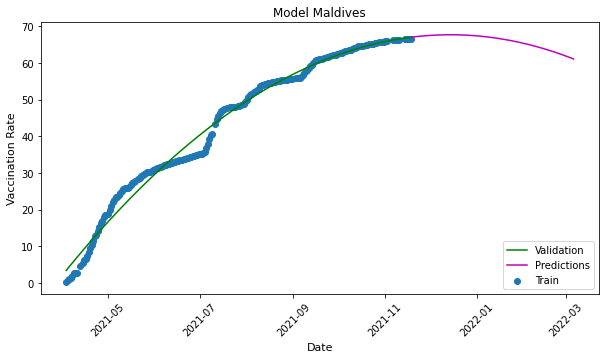

Observations in Actual Data = 198.000000, Predicted Observations=108.000000

 ------------- ('MEX', 'North America', 'Mexico') --------------
('MEX', 'North America', 'Mexico')
rmse:  0.8422456668158497
r2:  0.9966779277855352
('MEX', 'North America', 'Mexico')
rmse:  0.8422456668158497
r2:  0.9966779277855352
('MEX', 'North America', 'Mexico')
rmse:  0.8422456668158497
r2:  0.9966779277855352
('MEX', 'North America', 'Mexico')
rmse:  0.8422456668158497
r2:  0.9966779277855352


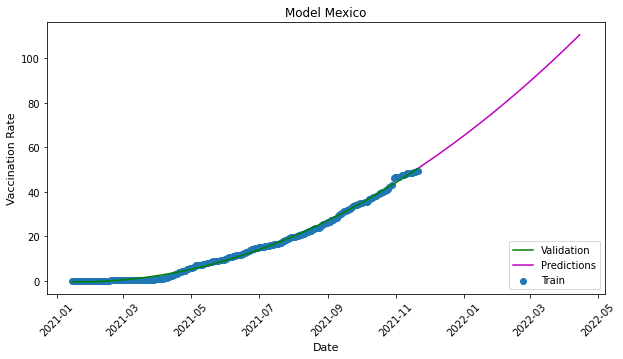

Observations in Actual Data = 272.000000, Predicted Observations=145.000000

 ------------- ('MHL', 'Oceania', 'Marshall Islands') --------------

 ------------- ('MKD', 'Europe', 'North Macedonia') --------------
('MKD', 'Europe', 'North Macedonia')
rmse:  1.514732125330816
r2:  0.9846033601616997
('MKD', 'Europe', 'North Macedonia')
rmse:  1.514732125330816
r2:  0.9846033601616997
('MKD', 'Europe', 'North Macedonia')
rmse:  1.514732125330816
r2:  0.9846033601616997
('MKD', 'Europe', 'North Macedonia')
rmse:  1.514732125330816
r2:  0.9846033601616997


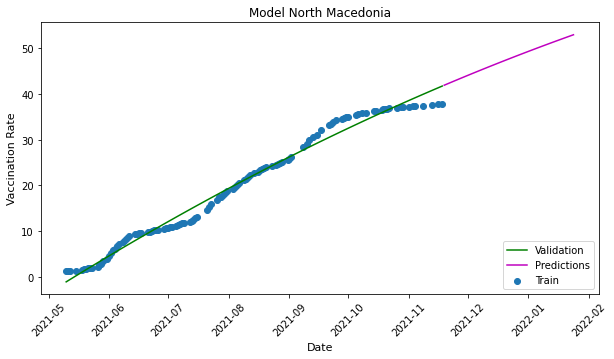

Observations in Actual Data = 116.000000, Predicted Observations=67.000000

 ------------- ('MLI', 'Africa', 'Mali') --------------

 ------------- ('MLT', 'Europe', 'Malta') --------------
('MLT', 'Europe', 'Malta')
rmse:  7.263998680229389
r2:  0.9478784971170202
('MLT', 'Europe', 'Malta')
rmse:  7.263998680229389
r2:  0.9478784971170202
('MLT', 'Europe', 'Malta')
rmse:  7.263998680229389
r2:  0.9478784971170202
('MLT', 'Europe', 'Malta')
rmse:  7.263998680229389
r2:  0.9478784971170202


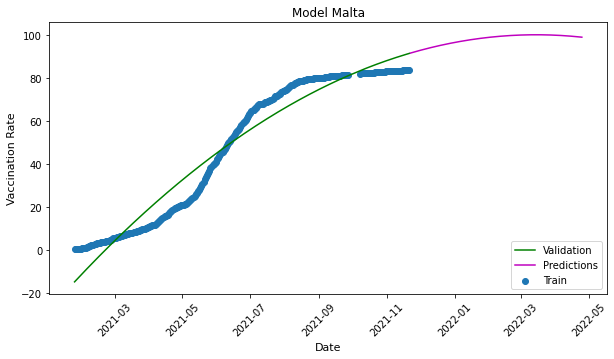

Observations in Actual Data = 292.000000, Predicted Observations=155.000000

 ------------- ('MMR', 'Asia', 'Myanmar') --------------

 ------------- ('MNE', 'Europe', 'Montenegro') --------------
('MNE', 'Europe', 'Montenegro')
rmse:  1.9360618619397951
r2:  0.9780657960554218
('MNE', 'Europe', 'Montenegro')
rmse:  1.9360618619397951
r2:  0.9780657960554218
('MNE', 'Europe', 'Montenegro')
rmse:  1.9360618619397951
r2:  0.9780657960554218
('MNE', 'Europe', 'Montenegro')
rmse:  1.9360618619397951
r2:  0.9780657960554218


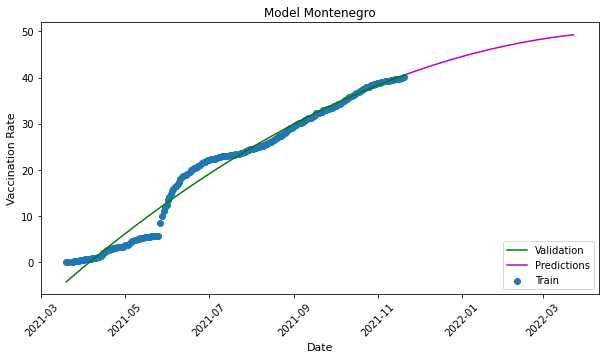

Observations in Actual Data = 229.000000, Predicted Observations=123.000000

 ------------- ('MNG', 'Asia', 'Mongolia') --------------
('MNG', 'Asia', 'Mongolia')
rmse:  3.8688952567430013
r2:  0.9502309790743921
('MNG', 'Asia', 'Mongolia')
rmse:  3.8688952567430013
r2:  0.9502309790743921
('MNG', 'Asia', 'Mongolia')
rmse:  3.8688952567430013
r2:  0.9502309790743921
('MNG', 'Asia', 'Mongolia')
rmse:  3.8688952567430013
r2:  0.9502309790743921


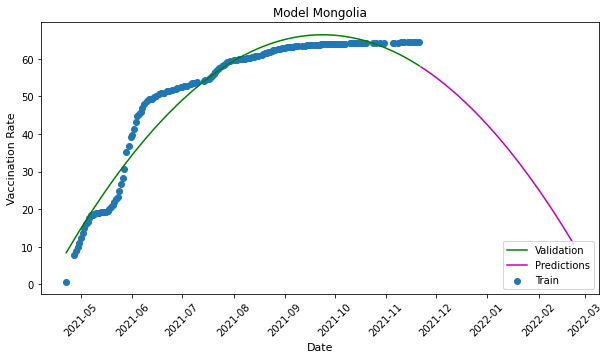

Observations in Actual Data = 167.000000, Predicted Observations=93.000000

 ------------- ('MOZ', 'Africa', 'Mozambique') --------------

 ------------- ('MRT', 'Africa', 'Mauritania') --------------

 ------------- ('MSR', 'North America', 'Montserrat') --------------

 ------------- ('MUS', 'Africa', 'Mauritius') --------------

 ------------- ('MWI', 'Africa', 'Malawi') --------------
('MWI', 'Africa', 'Malawi')
rmse:  0.2182551766671598
r2:  0.9539304320401722
('MWI', 'Africa', 'Malawi')
rmse:  0.2182551766671598
r2:  0.9539304320401722
('MWI', 'Africa', 'Malawi')
rmse:  0.2182551766671598
r2:  0.9539304320401722
('MWI', 'Africa', 'Malawi')
rmse:  0.2182551766671598
r2:  0.9539304320401722


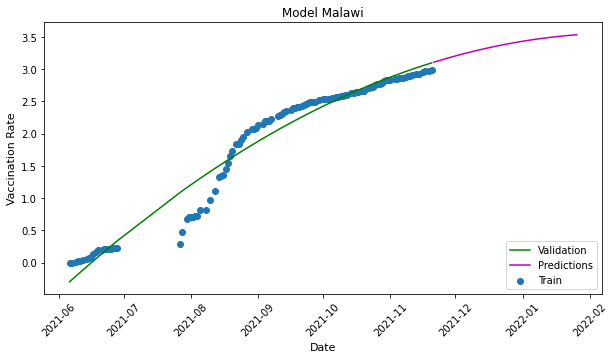

Observations in Actual Data = 115.000000, Predicted Observations=67.000000

 ------------- ('MYS', 'Asia', 'Malaysia') --------------
('MYS', 'Asia', 'Malaysia')
rmse:  4.9587282851656305
r2:  0.9694669641334184
('MYS', 'Asia', 'Malaysia')
rmse:  4.9587282851656305
r2:  0.9694669641334184
('MYS', 'Asia', 'Malaysia')
rmse:  4.9587282851656305
r2:  0.9694669641334184
('MYS', 'Asia', 'Malaysia')
rmse:  4.9587282851656305
r2:  0.9694669641334184


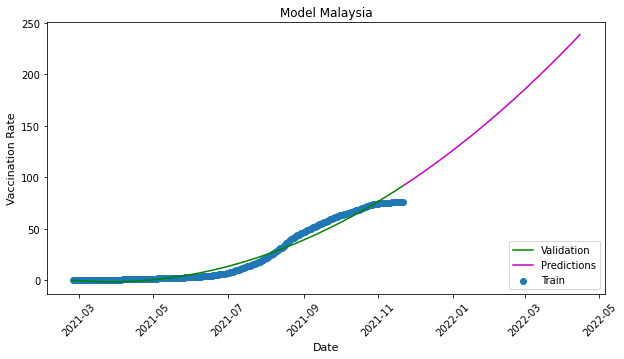

Observations in Actual Data = 271.000000, Predicted Observations=145.000000

 ------------- ('NAM', 'Africa', 'Namibia') --------------
('NAM', 'Africa', 'Namibia')
rmse:  0.20523095899211688
r2:  0.9920182417988092
('NAM', 'Africa', 'Namibia')
rmse:  0.20523095899211688
r2:  0.9920182417988092
('NAM', 'Africa', 'Namibia')
rmse:  0.20523095899211688
r2:  0.9920182417988092
('NAM', 'Africa', 'Namibia')
rmse:  0.20523095899211688
r2:  0.9920182417988092


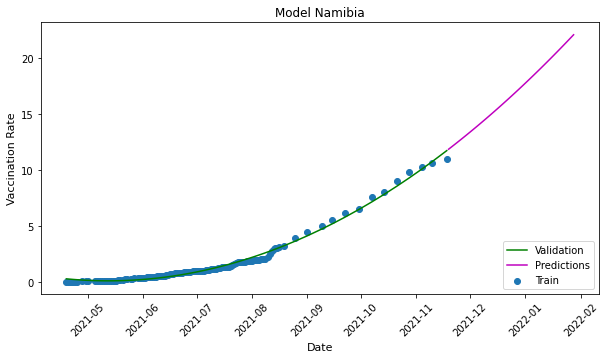

Observations in Actual Data = 123.000000, Predicted Observations=71.000000

 ------------- ('NCL', 'Oceania', 'New Caledonia') --------------

 ------------- ('NER', 'Africa', 'Niger') --------------

 ------------- ('NGA', 'Africa', 'Nigeria') --------------

 ------------- ('NIC', 'North America', 'Nicaragua') --------------

 ------------- ('NIU', 'Oceania', 'Niue') --------------

 ------------- ('NLD', 'Europe', 'Netherlands') --------------

 ------------- ('NOR', 'Europe', 'Norway') --------------
('NOR', 'Europe', 'Norway')
rmse:  4.803473673554012
r2:  0.9652702186814814
('NOR', 'Europe', 'Norway')
rmse:  4.803473673554012
r2:  0.9652702186814814
('NOR', 'Europe', 'Norway')
rmse:  4.803473673554012
r2:  0.9652702186814814
('NOR', 'Europe', 'Norway')
rmse:  4.803473673554012
r2:  0.9652702186814814


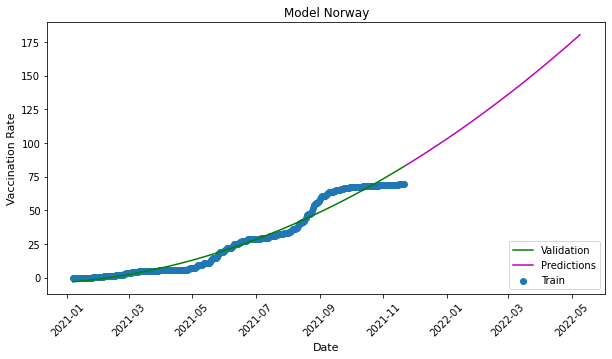

Observations in Actual Data = 320.000000, Predicted Observations=169.000000

 ------------- ('NPL', 'Asia', 'Nepal') --------------
('NPL', 'Asia', 'Nepal')
rmse:  1.747382624604378
r2:  0.9493278668756862
('NPL', 'Asia', 'Nepal')
rmse:  1.747382624604378
r2:  0.9493278668756862
('NPL', 'Asia', 'Nepal')
rmse:  1.747382624604378
r2:  0.9493278668756862
('NPL', 'Asia', 'Nepal')
rmse:  1.747382624604378
r2:  0.9493278668756862


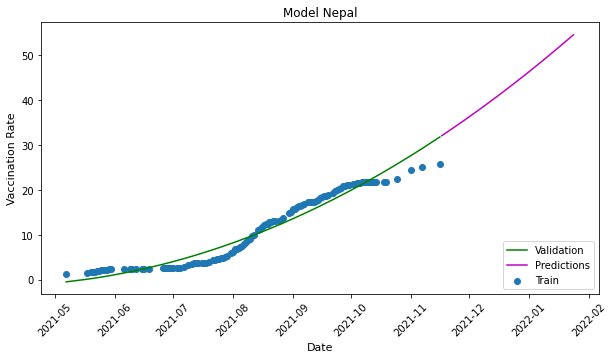

Observations in Actual Data = 121.000000, Predicted Observations=69.000000

 ------------- ('NRU', 'Oceania', 'Nauru') --------------

 ------------- ('NZL', 'Oceania', 'New Zealand') --------------
('NZL', 'Oceania', 'New Zealand')
rmse:  2.434516271873046
r2:  0.9858835123310375
('NZL', 'Oceania', 'New Zealand')
rmse:  2.434516271873046
r2:  0.9858835123310375
('NZL', 'Oceania', 'New Zealand')
rmse:  2.434516271873046
r2:  0.9858835123310375
('NZL', 'Oceania', 'New Zealand')
rmse:  2.434516271873046
r2:  0.9858835123310375


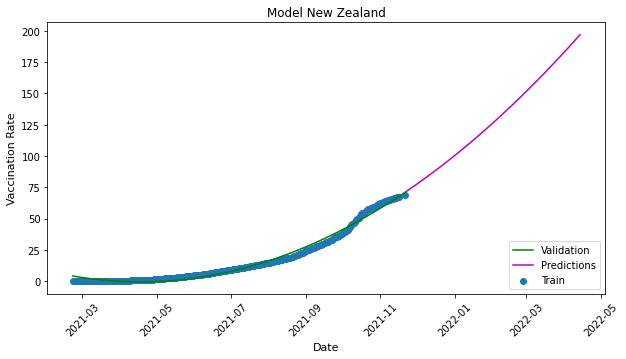

Observations in Actual Data = 270.000000, Predicted Observations=144.000000

 ------------- ('OMN', 'Asia', 'Oman') --------------
('OMN', 'Asia', 'Oman')
rmse:  2.6368460532738767
r2:  0.9609661772070925
('OMN', 'Asia', 'Oman')
rmse:  2.6368460532738767
r2:  0.9609661772070925
('OMN', 'Asia', 'Oman')
rmse:  2.6368460532738767
r2:  0.9609661772070925
('OMN', 'Asia', 'Oman')
rmse:  2.6368460532738767
r2:  0.9609661772070925


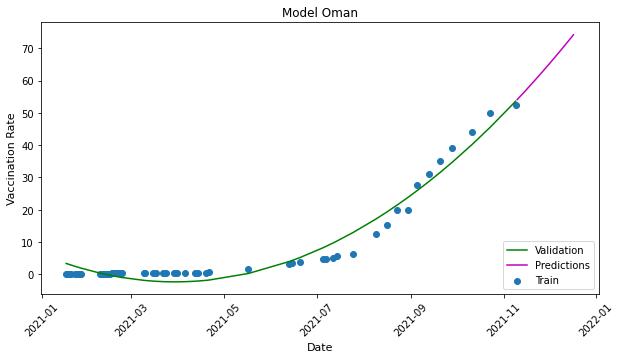

Observations in Actual Data = 58.000000, Predicted Observations=38.000000

 ------------- ('OWID_CYN', 'Asia', 'Northern Cyprus') --------------

 ------------- ('OWID_KOS', 'Europe', 'Kosovo') --------------
('OWID_KOS', 'Europe', 'Kosovo')
rmse:  2.05819809630271
r2:  0.976234830511272
('OWID_KOS', 'Europe', 'Kosovo')
rmse:  2.05819809630271
r2:  0.976234830511272
('OWID_KOS', 'Europe', 'Kosovo')
rmse:  2.05819809630271
r2:  0.976234830511272
('OWID_KOS', 'Europe', 'Kosovo')
rmse:  2.05819809630271
r2:  0.976234830511272


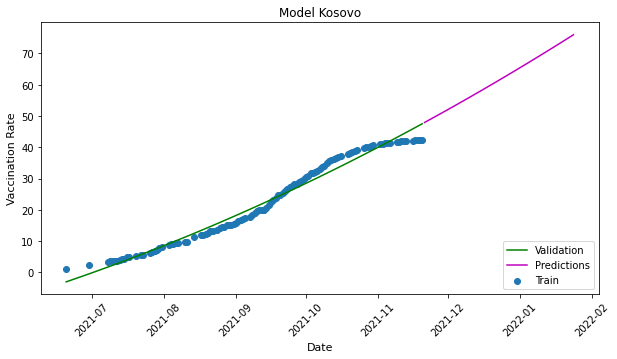

Observations in Actual Data = 113.000000, Predicted Observations=65.000000

 ------------- ('PAK', 'Asia', 'Pakistan') --------------
('PAK', 'Asia', 'Pakistan')
rmse:  0.40306358989539676
r2:  0.9967841281042054
('PAK', 'Asia', 'Pakistan')
rmse:  0.40306358989539676
r2:  0.9967841281042054
('PAK', 'Asia', 'Pakistan')
rmse:  0.40306358989539676
r2:  0.9967841281042054
('PAK', 'Asia', 'Pakistan')
rmse:  0.40306358989539676
r2:  0.9967841281042054


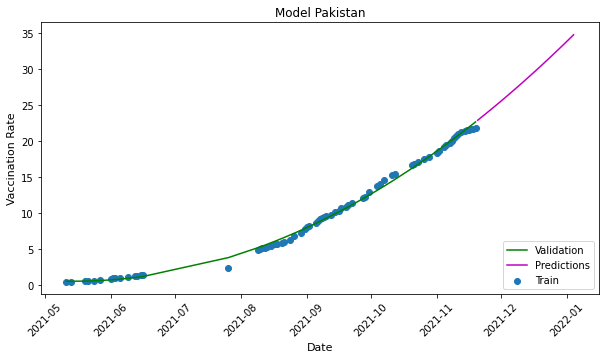

Observations in Actual Data = 74.000000, Predicted Observations=46.000000

 ------------- ('PAN', 'North America', 'Panama') --------------
('PAN', 'North America', 'Panama')
rmse:  4.875405357550312
r2:  0.9469299273531773
('PAN', 'North America', 'Panama')
rmse:  4.875405357550312
r2:  0.9469299273531773
('PAN', 'North America', 'Panama')
rmse:  4.875405357550312
r2:  0.9469299273531773
('PAN', 'North America', 'Panama')
rmse:  4.875405357550312
r2:  0.9469299273531773


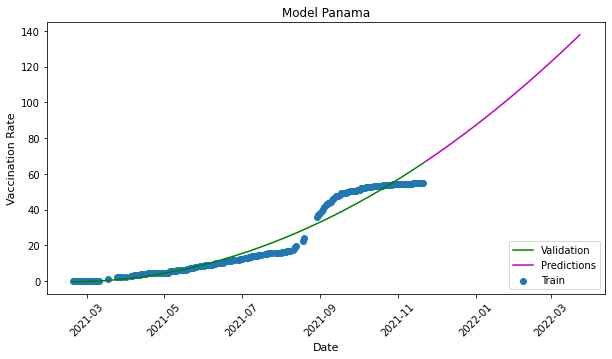

Observations in Actual Data = 228.000000, Predicted Observations=123.000000

 ------------- ('PCN', 'Oceania', 'Pitcairn') --------------

 ------------- ('PER', 'South America', 'Peru') --------------
('PER', 'South America', 'Peru')
rmse:  1.1058669735505904
r2:  0.9954686418074312
('PER', 'South America', 'Peru')
rmse:  1.1058669735505904
r2:  0.9954686418074312
('PER', 'South America', 'Peru')
rmse:  1.1058669735505904
r2:  0.9954686418074312
('PER', 'South America', 'Peru')
rmse:  1.1058669735505904
r2:  0.9954686418074312


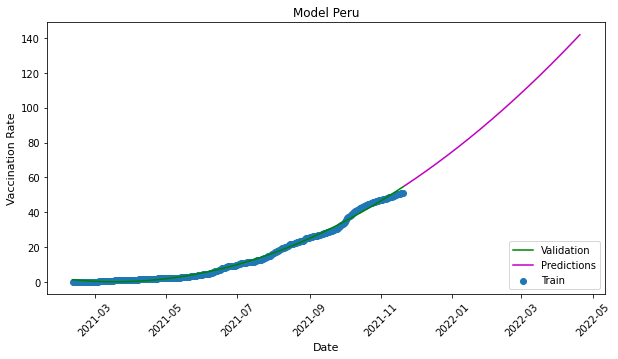

Observations in Actual Data = 284.000000, Predicted Observations=151.000000

 ------------- ('PHL', 'Asia', 'Philippines') --------------
('PHL', 'Asia', 'Philippines')
rmse:  0.8690044116505342
r2:  0.9905888278265413
('PHL', 'Asia', 'Philippines')
rmse:  0.8690044116505342
r2:  0.9905888278265413
('PHL', 'Asia', 'Philippines')
rmse:  0.8690044116505342
r2:  0.9905888278265413
('PHL', 'Asia', 'Philippines')
rmse:  0.8690044116505342
r2:  0.9905888278265413


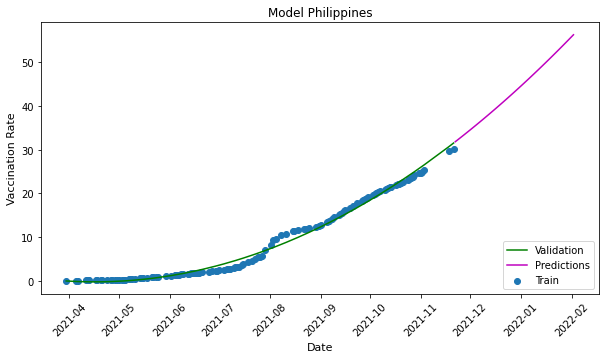

Observations in Actual Data = 128.000000, Predicted Observations=73.000000

 ------------- ('PLW', 'Oceania', 'Palau') --------------

 ------------- ('PNG', 'Oceania', 'Papua New Guinea') --------------

 ------------- ('POL', 'Europe', 'Poland') --------------
('POL', 'Europe', 'Poland')
rmse:  5.620444377811697
r2:  0.9269833194960376
('POL', 'Europe', 'Poland')
rmse:  5.620444377811697
r2:  0.9269833194960376
('POL', 'Europe', 'Poland')
rmse:  5.620444377811697
r2:  0.9269833194960376
('POL', 'Europe', 'Poland')
rmse:  5.620444377811697
r2:  0.9269833194960376


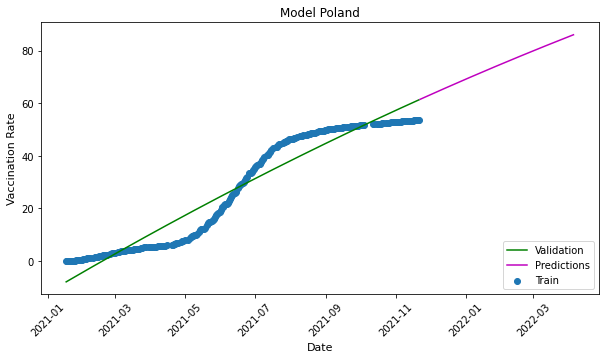

Observations in Actual Data = 253.000000, Predicted Observations=135.000000

 ------------- ('PRT', 'Europe', 'Portugal') --------------
('PRT', 'Europe', 'Portugal')
rmse:  5.862707876755565
r2:  0.9599051489390358
('PRT', 'Europe', 'Portugal')
rmse:  5.862707876755565
r2:  0.9599051489390358
('PRT', 'Europe', 'Portugal')
rmse:  5.862707876755565
r2:  0.9599051489390358
('PRT', 'Europe', 'Portugal')
rmse:  5.862707876755565
r2:  0.9599051489390358


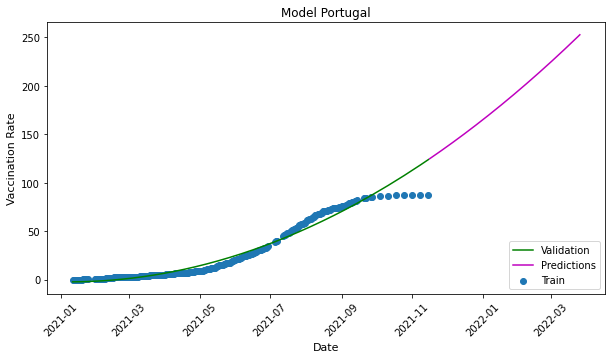

Observations in Actual Data = 243.000000, Predicted Observations=131.000000

 ------------- ('PRY', 'South America', 'Paraguay') --------------
('PRY', 'South America', 'Paraguay')
rmse:  3.1430263050073735
r2:  0.8824143648989929
('PRY', 'South America', 'Paraguay')
rmse:  3.1430263050073735
r2:  0.8824143648989929
('PRY', 'South America', 'Paraguay')
rmse:  3.1430263050073735
r2:  0.8824143648989929
('PRY', 'South America', 'Paraguay')
rmse:  3.1430263050073735
r2:  0.8824143648989929


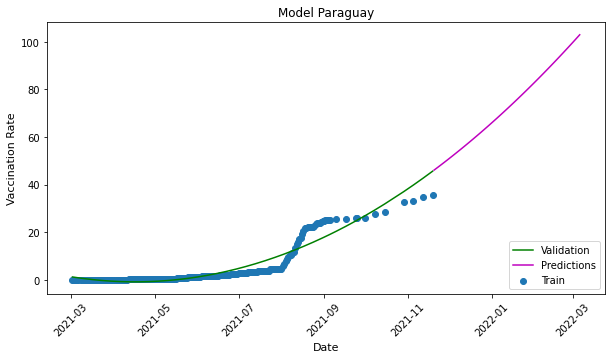

Observations in Actual Data = 197.000000, Predicted Observations=107.000000

 ------------- ('PSE', 'Asia', 'Palestine') --------------

 ------------- ('PYF', 'Oceania', 'French Polynesia') --------------

 ------------- ('QAT', 'Asia', 'Qatar') --------------
('QAT', 'Asia', 'Qatar')
rmse:  1.0575446319672508
r2:  0.99524549020693
('QAT', 'Asia', 'Qatar')
rmse:  1.0575446319672508
r2:  0.99524549020693
('QAT', 'Asia', 'Qatar')
rmse:  1.0575446319672508
r2:  0.99524549020693
('QAT', 'Asia', 'Qatar')
rmse:  1.0575446319672508
r2:  0.99524549020693


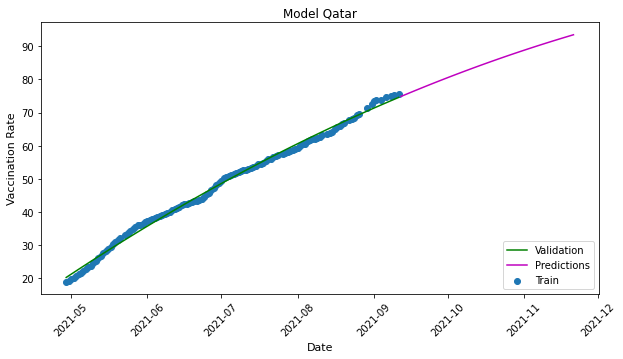

Observations in Actual Data = 125.000000, Predicted Observations=71.000000

 ------------- ('ROU', 'Europe', 'Romania') --------------
('ROU', 'Europe', 'Romania')
rmse:  2.0105047990385216
r2:  0.9682274675612877
('ROU', 'Europe', 'Romania')
rmse:  2.0105047990385216
r2:  0.9682274675612877
('ROU', 'Europe', 'Romania')
rmse:  2.0105047990385216
r2:  0.9682274675612877
('ROU', 'Europe', 'Romania')
rmse:  2.0105047990385216
r2:  0.9682274675612877


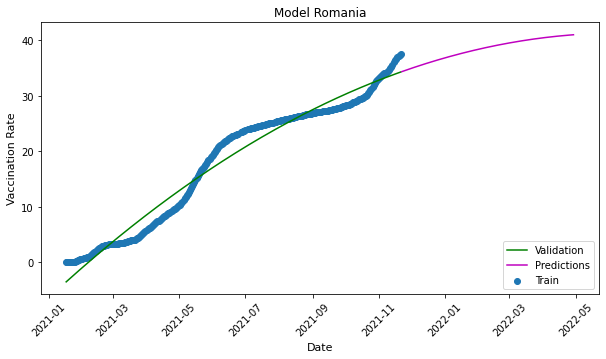

Observations in Actual Data = 301.000000, Predicted Observations=159.000000

 ------------- ('RUS', 'Europe', 'Russia') --------------
('RUS', 'Europe', 'Russia')
rmse:  1.312812920905298
r2:  0.9851463531300084
('RUS', 'Europe', 'Russia')
rmse:  1.312812920905298
r2:  0.9851463531300084
('RUS', 'Europe', 'Russia')
rmse:  1.312812920905298
r2:  0.9851463531300084
('RUS', 'Europe', 'Russia')
rmse:  1.312812920905298
r2:  0.9851463531300084


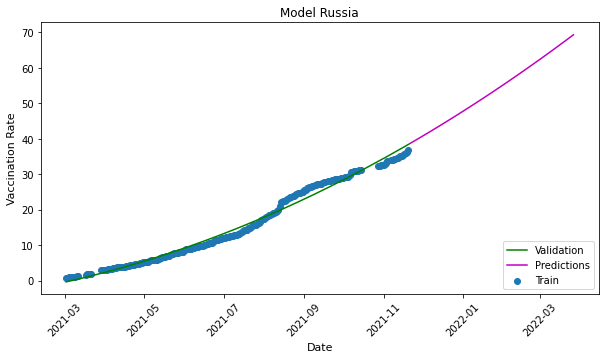

Observations in Actual Data = 235.000000, Predicted Observations=127.000000

 ------------- ('RWA', 'Africa', 'Rwanda') --------------

 ------------- ('SAU', 'Asia', 'Saudi Arabia') --------------
('SAU', 'Asia', 'Saudi Arabia')
rmse:  1.4016455971027197
r2:  0.9948529889175813
('SAU', 'Asia', 'Saudi Arabia')
rmse:  1.4016455971027197
r2:  0.9948529889175813
('SAU', 'Asia', 'Saudi Arabia')
rmse:  1.4016455971027197
r2:  0.9948529889175813
('SAU', 'Asia', 'Saudi Arabia')
rmse:  1.4016455971027197
r2:  0.9948529889175813


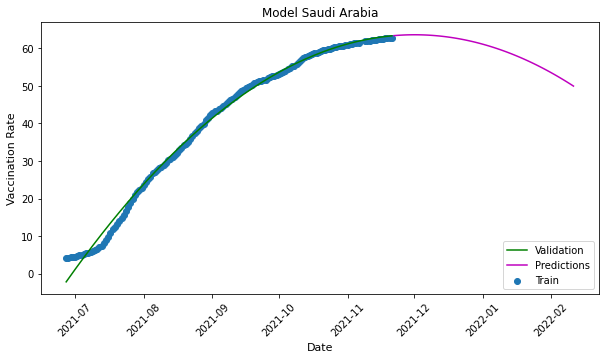

Observations in Actual Data = 146.000000, Predicted Observations=82.000000

 ------------- ('SDN', 'Africa', 'Sudan') --------------

 ------------- ('SEN', 'Africa', 'Senegal') --------------

 ------------- ('SGP', 'Asia', 'Singapore') --------------
('SGP', 'Asia', 'Singapore')
rmse:  6.384821258220867
r2:  0.9505475285152221
('SGP', 'Asia', 'Singapore')
rmse:  6.384821258220867
r2:  0.9505475285152221
('SGP', 'Asia', 'Singapore')
rmse:  6.384821258220867
r2:  0.9505475285152221
('SGP', 'Asia', 'Singapore')
rmse:  6.384821258220867
r2:  0.9505475285152221


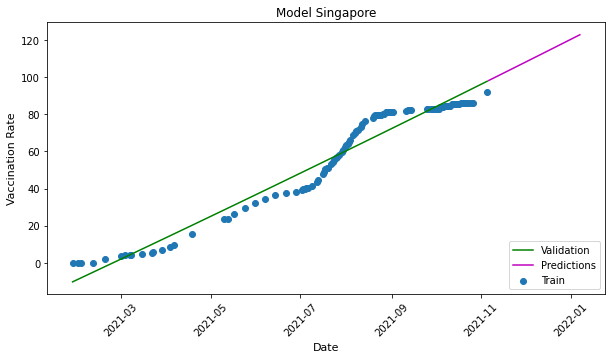

Observations in Actual Data = 108.000000, Predicted Observations=63.000000

 ------------- ('SHN', 'Africa', 'Saint Helena') --------------

 ------------- ('SLB', 'Oceania', 'Solomon Islands') --------------

 ------------- ('SLE', 'Africa', 'Sierra Leone') --------------

 ------------- ('SLV', 'North America', 'El Salvador') --------------
('SLV', 'North America', 'El Salvador')
rmse:  3.0376517887001793
r2:  0.9771970348074537
('SLV', 'North America', 'El Salvador')
rmse:  3.0376517887001793
r2:  0.9771970348074537
('SLV', 'North America', 'El Salvador')
rmse:  3.0376517887001793
r2:  0.9771970348074537
('SLV', 'North America', 'El Salvador')
rmse:  3.0376517887001793
r2:  0.9771970348074537


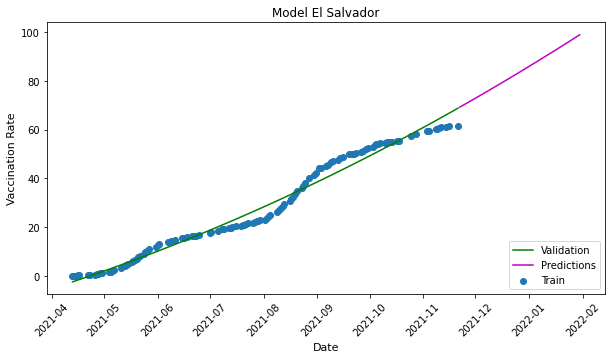

Observations in Actual Data = 122.000000, Predicted Observations=70.000000

 ------------- ('SMR', 'Europe', 'San Marino') --------------
('SMR', 'Europe', 'San Marino')
rmse:  4.917313546472506
r2:  0.955584593371915
('SMR', 'Europe', 'San Marino')
rmse:  4.917313546472506
r2:  0.955584593371915
('SMR', 'Europe', 'San Marino')
rmse:  4.917313546472506
r2:  0.955584593371915
('SMR', 'Europe', 'San Marino')
rmse:  4.917313546472506
r2:  0.955584593371915


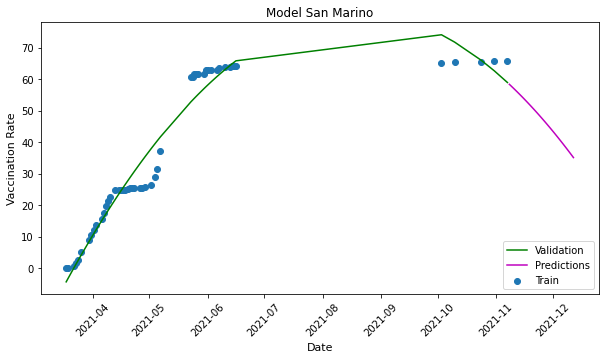

Observations in Actual Data = 52.000000, Predicted Observations=35.000000

 ------------- ('SOM', 'Africa', 'Somalia') --------------

 ------------- ('SRB', 'Europe', 'Serbia') --------------
('SRB', 'Europe', 'Serbia')
rmse:  0.9856496168982374
r2:  0.994641224916181
('SRB', 'Europe', 'Serbia')
rmse:  0.9856496168982374
r2:  0.994641224916181
('SRB', 'Europe', 'Serbia')
rmse:  0.9856496168982374
r2:  0.994641224916181
('SRB', 'Europe', 'Serbia')
rmse:  0.9856496168982374
r2:  0.994641224916181


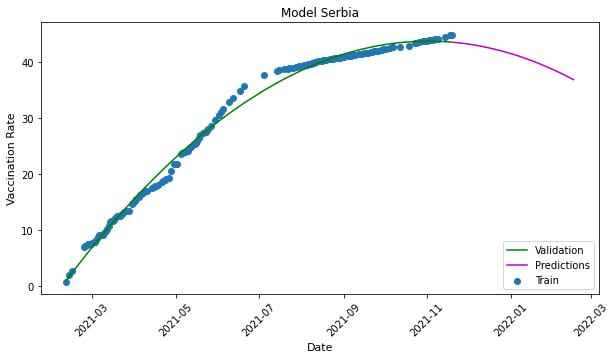

Observations in Actual Data = 160.000000, Predicted Observations=89.000000

 ------------- ('SSD', 'Africa', 'South Sudan') --------------

 ------------- ('STP', 'Africa', 'Sao Tome and Principe') --------------

 ------------- ('SUR', 'South America', 'Suriname') --------------
('SUR', 'South America', 'Suriname')
rmse:  2.1791514839523587
r2:  0.9672276920481877
('SUR', 'South America', 'Suriname')
rmse:  2.1791514839523587
r2:  0.9672276920481877
('SUR', 'South America', 'Suriname')
rmse:  2.1791514839523587
r2:  0.9672276920481877
('SUR', 'South America', 'Suriname')
rmse:  2.1791514839523587
r2:  0.9672276920481877


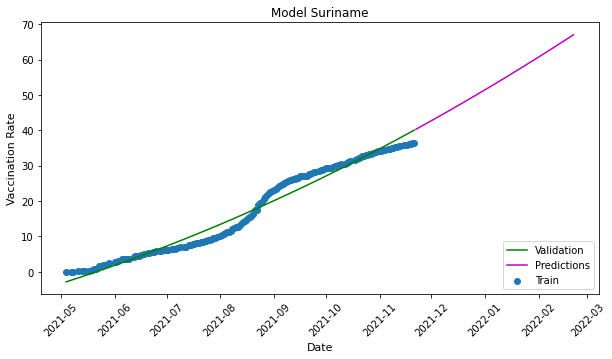

Observations in Actual Data = 166.000000, Predicted Observations=92.000000

 ------------- ('SVK', 'Europe', 'Slovakia') --------------
('SVK', 'Europe', 'Slovakia')
rmse:  3.9283730152166645
r2:  0.9432976924512653
('SVK', 'Europe', 'Slovakia')
rmse:  3.9283730152166645
r2:  0.9432976924512653
('SVK', 'Europe', 'Slovakia')
rmse:  3.9283730152166645
r2:  0.9432976924512653
('SVK', 'Europe', 'Slovakia')
rmse:  3.9283730152166645
r2:  0.9432976924512653


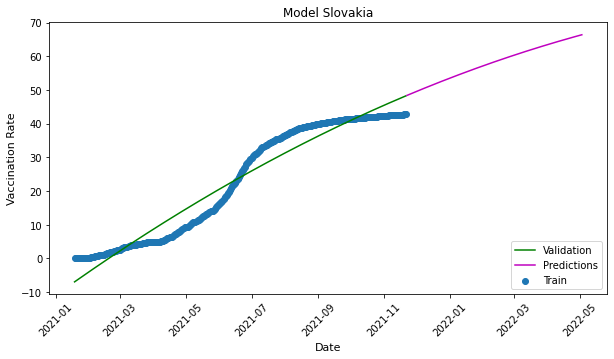

Observations in Actual Data = 308.000000, Predicted Observations=163.000000

 ------------- ('SVN', 'Europe', 'Slovenia') --------------
('SVN', 'Europe', 'Slovenia')
rmse:  3.835759061171007
r2:  0.9632629167321116
('SVN', 'Europe', 'Slovenia')
rmse:  3.835759061171007
r2:  0.9632629167321116
('SVN', 'Europe', 'Slovenia')
rmse:  3.835759061171007
r2:  0.9632629167321116
('SVN', 'Europe', 'Slovenia')
rmse:  3.835759061171007
r2:  0.9632629167321116


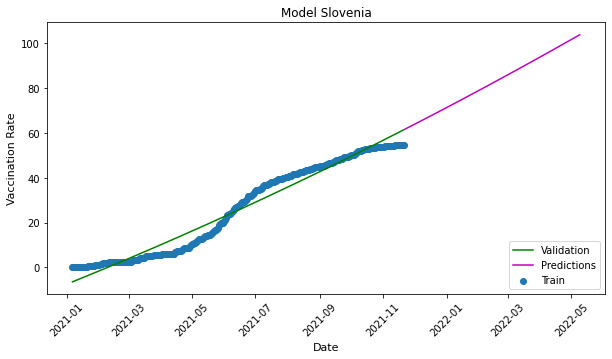

Observations in Actual Data = 320.000000, Predicted Observations=169.000000

 ------------- ('SWE', 'Europe', 'Sweden') --------------

 ------------- ('SWZ', 'Africa', 'Eswatini') --------------

 ------------- ('SXM', 'North America', 'Sint Maarten (Dutch part)') --------------

 ------------- ('SYC', 'Africa', 'Seychelles') --------------
('SYC', 'Africa', 'Seychelles')
rmse:  3.9835949413213396
r2:  0.9724220581025081
('SYC', 'Africa', 'Seychelles')
rmse:  3.9835949413213396
r2:  0.9724220581025081
('SYC', 'Africa', 'Seychelles')
rmse:  3.9835949413213396
r2:  0.9724220581025081
('SYC', 'Africa', 'Seychelles')
rmse:  3.9835949413213396
r2:  0.9724220581025081


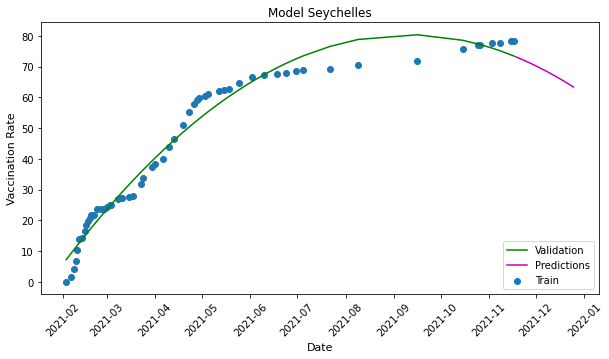

Observations in Actual Data = 58.000000, Predicted Observations=38.000000

 ------------- ('SYR', 'Asia', 'Syria') --------------

 ------------- ('TCA', 'North America', 'Turks and Caicos Islands') --------------

 ------------- ('TCD', 'Africa', 'Chad') --------------

 ------------- ('TGO', 'Africa', 'Togo') --------------

 ------------- ('THA', 'Asia', 'Thailand') --------------
('THA', 'Asia', 'Thailand')
rmse:  2.2795070590086075
r2:  0.9805469343796414
('THA', 'Asia', 'Thailand')
rmse:  2.2795070590086075
r2:  0.9805469343796414
('THA', 'Asia', 'Thailand')
rmse:  2.2795070590086075
r2:  0.9805469343796414
('THA', 'Asia', 'Thailand')
rmse:  2.2795070590086075
r2:  0.9805469343796414


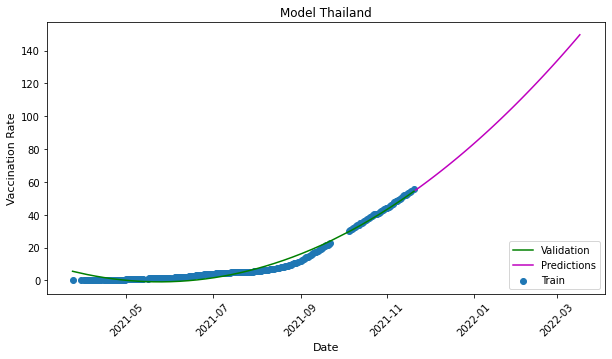

Observations in Actual Data = 217.000000, Predicted Observations=117.000000

 ------------- ('TJK', 'Asia', 'Tajikistan') --------------

 ------------- ('TKL', 'Oceania', 'Tokelau') --------------

 ------------- ('TKM', 'Asia', 'Turkmenistan') --------------

 ------------- ('TLS', 'Asia', 'Timor') --------------

 ------------- ('TON', 'Oceania', 'Tonga') --------------

 ------------- ('TTO', 'North America', 'Trinidad and Tobago') --------------
('TTO', 'North America', 'Trinidad and Tobago')
rmse:  2.457764286924849
r2:  0.9771661321581642
('TTO', 'North America', 'Trinidad and Tobago')
rmse:  2.457764286924849
r2:  0.9771661321581642
('TTO', 'North America', 'Trinidad and Tobago')
rmse:  2.457764286924849
r2:  0.9771661321581642
('TTO', 'North America', 'Trinidad and Tobago')
rmse:  2.457764286924849
r2:  0.9771661321581642


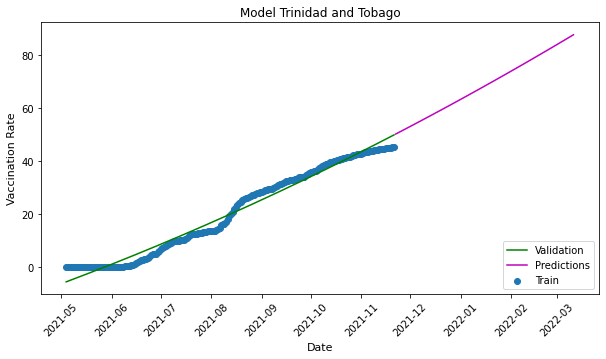

Observations in Actual Data = 202.000000, Predicted Observations=110.000000

 ------------- ('TUN', 'Africa', 'Tunisia') --------------
('TUN', 'Africa', 'Tunisia')
rmse:  2.06858246652771
r2:  0.9806152844530353
('TUN', 'Africa', 'Tunisia')
rmse:  2.06858246652771
r2:  0.9806152844530353
('TUN', 'Africa', 'Tunisia')
rmse:  2.06858246652771
r2:  0.9806152844530353
('TUN', 'Africa', 'Tunisia')
rmse:  2.06858246652771
r2:  0.9806152844530353


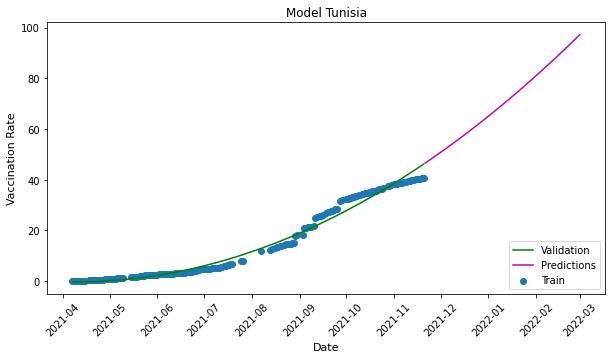

Observations in Actual Data = 185.000000, Predicted Observations=101.000000

 ------------- ('TUR', 'Asia', 'Turkey') --------------
('TUR', 'Asia', 'Turkey')
rmse:  3.0307022103010652
r2:  0.9763876740530261
('TUR', 'Asia', 'Turkey')
rmse:  3.0307022103010652
r2:  0.9763876740530261
('TUR', 'Asia', 'Turkey')
rmse:  3.0307022103010652
r2:  0.9763876740530261
('TUR', 'Asia', 'Turkey')
rmse:  3.0307022103010652
r2:  0.9763876740530261


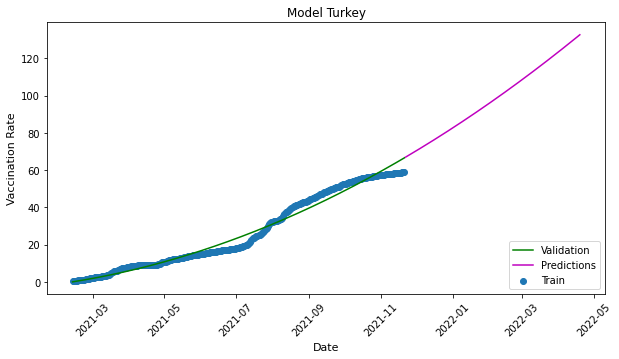

Observations in Actual Data = 281.000000, Predicted Observations=149.000000

 ------------- ('TUV', 'Oceania', 'Tuvalu') --------------

 ------------- ('TWN', 'Asia', 'Taiwan') --------------
('TWN', 'Asia', 'Taiwan')
rmse:  1.8192933381812968
r2:  0.9824168898893242
('TWN', 'Asia', 'Taiwan')
rmse:  1.8192933381812968
r2:  0.9824168898893242
('TWN', 'Asia', 'Taiwan')
rmse:  1.8192933381812968
r2:  0.9824168898893242
('TWN', 'Asia', 'Taiwan')
rmse:  1.8192933381812968
r2:  0.9824168898893242


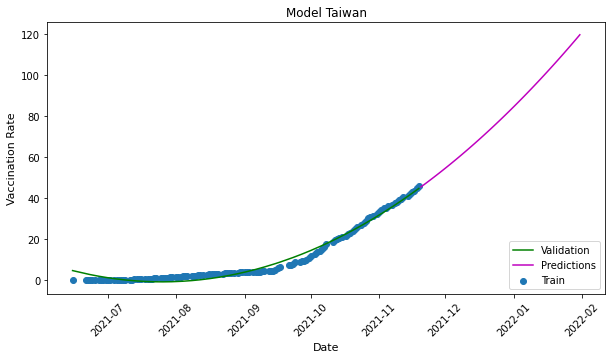

Observations in Actual Data = 129.000000, Predicted Observations=73.000000

 ------------- ('TZA', 'Africa', 'Tanzania') --------------

 ------------- ('UGA', 'Africa', 'Uganda') --------------

 ------------- ('UKR', 'Europe', 'Ukraine') --------------
('UKR', 'Europe', 'Ukraine')
rmse:  0.47832048709238195
r2:  0.994946875634481
('UKR', 'Europe', 'Ukraine')
rmse:  0.47832048709238195
r2:  0.994946875634481
('UKR', 'Europe', 'Ukraine')
rmse:  0.47832048709238195
r2:  0.994946875634481
('UKR', 'Europe', 'Ukraine')
rmse:  0.47832048709238195
r2:  0.994946875634481


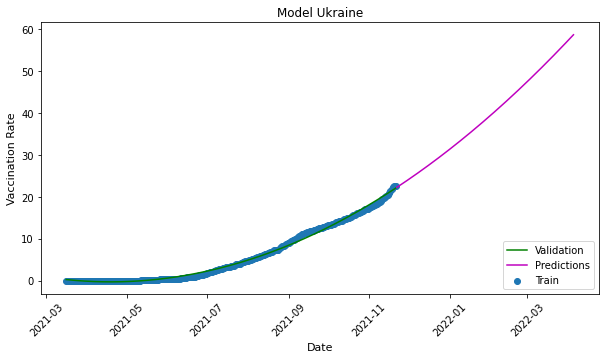

Observations in Actual Data = 251.000000, Predicted Observations=135.000000

 ------------- ('URY', 'South America', 'Uruguay') --------------
('URY', 'South America', 'Uruguay')
rmse:  2.884561596203411
r2:  0.9863159256293108
('URY', 'South America', 'Uruguay')
rmse:  2.884561596203411
r2:  0.9863159256293108
('URY', 'South America', 'Uruguay')
rmse:  2.884561596203411
r2:  0.9863159256293108
('URY', 'South America', 'Uruguay')
rmse:  2.884561596203411
r2:  0.9863159256293108


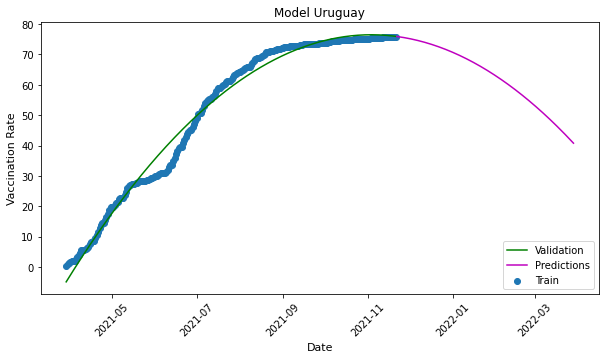

Observations in Actual Data = 238.000000, Predicted Observations=128.000000

 ------------- ('USA', 'North America', 'United States') --------------
('USA', 'North America', 'United States')
rmse:  3.7795068569872945
r2:  0.9688142650306535
('USA', 'North America', 'United States')
rmse:  3.7795068569872945
r2:  0.9688142650306535
('USA', 'North America', 'United States')
rmse:  3.7795068569872945
r2:  0.9688142650306535
('USA', 'North America', 'United States')
rmse:  3.7795068569872945
r2:  0.9688142650306535


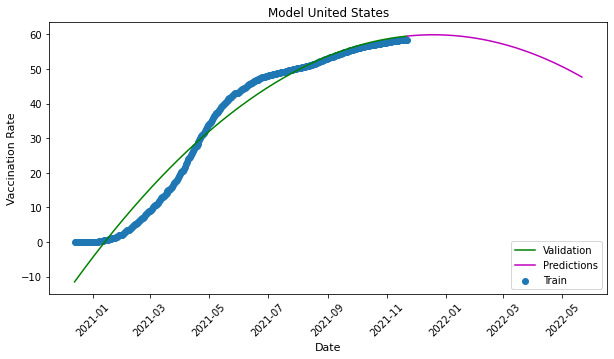

Observations in Actual Data = 344.000000, Predicted Observations=181.000000

 ------------- ('UZB', 'Asia', 'Uzbekistan') --------------

 ------------- ('VAT', 'Europe', 'Vatican') --------------

 ------------- ('VCT', 'North America', 'Saint Vincent and the Grenadines') --------------

 ------------- ('VEN', 'South America', 'Venezuela') --------------

 ------------- ('VGB', 'North America', 'British Virgin Islands') --------------

 ------------- ('VNM', 'Asia', 'Vietnam') --------------
('VNM', 'Asia', 'Vietnam')
rmse:  2.029831233097666
r2:  0.9658303590979742
('VNM', 'Asia', 'Vietnam')
rmse:  2.029831233097666
r2:  0.9658303590979742
('VNM', 'Asia', 'Vietnam')
rmse:  2.029831233097666
r2:  0.9658303590979742
('VNM', 'Asia', 'Vietnam')
rmse:  2.029831233097666
r2:  0.9658303590979742


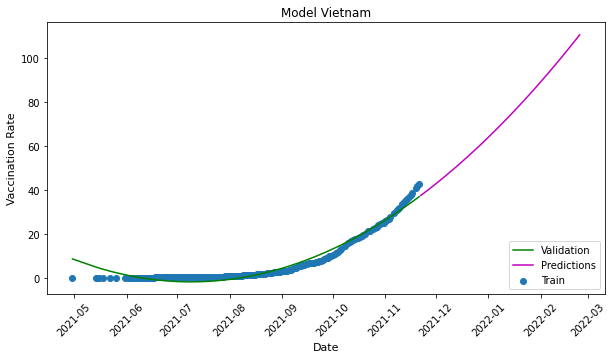

Observations in Actual Data = 171.000000, Predicted Observations=95.000000

 ------------- ('VUT', 'Oceania', 'Vanuatu') --------------

 ------------- ('WLF', 'Oceania', 'Wallis and Futuna') --------------

 ------------- ('WSM', 'Oceania', 'Samoa') --------------

 ------------- ('YEM', 'Asia', 'Yemen') --------------

 ------------- ('ZAF', 'Africa', 'South Africa') --------------
('ZAF', 'Africa', 'South Africa')
rmse:  0.696087602319401
r2:  0.9923342473348531
('ZAF', 'Africa', 'South Africa')
rmse:  0.696087602319401
r2:  0.9923342473348531
('ZAF', 'Africa', 'South Africa')
rmse:  0.696087602319401
r2:  0.9923342473348531
('ZAF', 'Africa', 'South Africa')
rmse:  0.696087602319401
r2:  0.9923342473348531


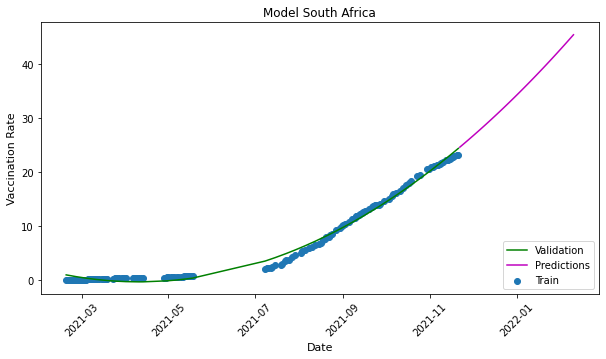

Observations in Actual Data = 143.000000, Predicted Observations=81.000000

 ------------- ('ZMB', 'Africa', 'Zambia') --------------
('ZMB', 'Africa', 'Zambia')
rmse:  0.13041398396212917
r2:  0.9831778856865941
('ZMB', 'Africa', 'Zambia')
rmse:  0.13041398396212917
r2:  0.9831778856865941
('ZMB', 'Africa', 'Zambia')
rmse:  0.13041398396212917
r2:  0.9831778856865941
('ZMB', 'Africa', 'Zambia')
rmse:  0.13041398396212917
r2:  0.9831778856865941


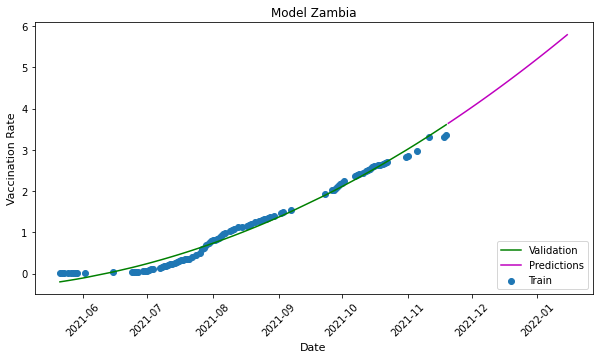

Observations in Actual Data = 97.000000, Predicted Observations=57.000000

 ------------- ('ZWE', 'Africa', 'Zimbabwe') --------------
('ZWE', 'Africa', 'Zimbabwe')
rmse:  0.9560149794139249
r2:  0.9781498592607638
('ZWE', 'Africa', 'Zimbabwe')
rmse:  0.9560149794139249
r2:  0.9781498592607638
('ZWE', 'Africa', 'Zimbabwe')
rmse:  0.9560149794139249
r2:  0.9781498592607638
('ZWE', 'Africa', 'Zimbabwe')
rmse:  0.9560149794139249
r2:  0.9781498592607638


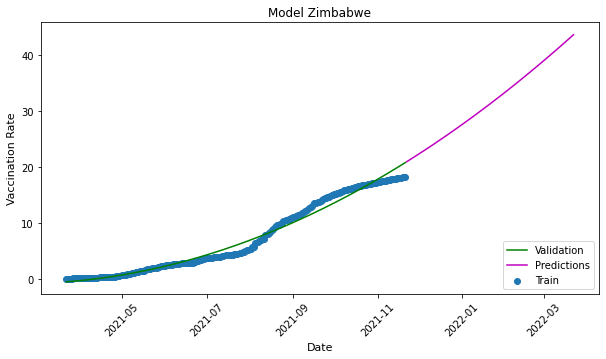

Observations in Actual Data = 224.000000, Predicted Observations=121.000000


In [19]:
# Dictionaries to save the results of the model
dct_original = {}
dct_future = {}
# Access each country data seperately
for name, group in df_grouped:
    print('\n -------------',name,'--------------')
    # Make sure to select countries without NaN values in vaccination_rates
    group1 = group[group['people_fully_vaccinated'].notna()]
    # Countries with at least 50 vaccination data points for better predictions
    if len(group1) > 50:
    # Save outputs from the function into the following variables
        predict_dates = poly(name, group1)[2]
        model = poly(name, group1)[0]
        polynomial_features = poly(name, group1)[1]
        group_export = poly(name, group1)[3]
        group_export['Location'] = name[2]
    # Future predictions for the range of dates specified in the function. Again, remember to tranform the input
        Predictions = model.predict(polynomial_features.fit_transform(np.array(predict_dates).reshape(-1,1)))
    # Putting the predictions and dates into a dataframe
        Predictions_df = pd.DataFrame({'Future_dates': list(predict_dates),'Predictions': list(Predictions)})
    # Converting the transformed dates to original date format
        Predictions_df = Predictions_df.set_index(Predictions_df['Future_dates'].map(dt.datetime.fromordinal))
    # Add country to the dataframe to identify the data
        Predictions_df['Location'] = name[2]    
    
    # Save input data predictions and future predictions into dictionaries to access later
        dct_original[name] = group_export
        dct_future[name] = Predictions_df
    # Plot current observed, predicted and future predicted data
        plt.figure(figsize=(10,5))
        plt.xticks(rotation=45)
        plt.title('Model ' + name[2])
        plt.xlabel('Date', fontsize=11)
        plt.ylabel('Vaccination Rate', fontsize=11)
        plt.scatter(group_export.index, group_export['vaccination_rate'])
        plt.plot(group_export['Pred'], color = 'g')
        plt.plot(Predictions_df[['Predictions']], color = 'm')
        plt.legend(['Validation', 'Predictions', 'Train'], loc='lower right')
        plt.show()
    # View the Actual vs Predicted data and their data count
        print('Observations in Actual Data = %f, Predicted Observations=%f' % (len(group1), len(Predictions)))
       # print( "\n".join("{} {}".format(x, y) for x, y in zip(predict_dates, Predictions)))
        if name[2]=='Russia':
            Predictions_df_rus=Predictions_df

In [20]:
Predictions_df_rus

,Future_dates,Predictions,Location
Future_dates,,,
2021-11-21,738115,38.600360,Russia
2021-11-22,738116,38.813490,Russia
2021-11-23,738117,39.027113,Russia
2021-11-24,738118,39.241230,Russia
2021-11-25,738119,39.455842,Russia
...,...,...,...
2022-03-23,738237,68.249767,Russia
2022-03-24,738238,68.523188,Russia
2022-03-25,738239,68.797103,Russia


In [36]:
df_ru=df[df['location']=='Russia']
df_ru.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,reproduction_rate,icu_patients,hosp_patients,new_tests,total_tests,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,case_rate,death_rate,test_rate,admissions_rate,critical_rate,vaccination_rate
100121,RUS,Europe,Russia,2020-01-31,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,145912022.0,8.823,39.6,14.178,9.393,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824,0.000001,NaN,NaN,NaN,NaN,NaN
100122,RUS,Europe,Russia,2020-02-01,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,145912022.0,8.823,39.6,14.178,9.393,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824,0.000001,NaN,NaN,NaN,NaN,NaN
100123,RUS,Europe,Russia,2020-02-02,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,145912022.0,8.823,39.6,14.178,9.393,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824,0.000001,NaN,NaN,NaN,NaN,NaN
100124,RUS,Europe,Russia,2020-02-03,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,145912022.0,8.823,39.6,14.178,9.393,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824,0.000001,NaN,NaN,NaN,NaN,NaN
100125,RUS,Europe,Russia,2020-02-04,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,145912022.0,8.823,39.6,14.178,9.393,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824,0.000001,NaN,NaN,NaN,NaN,NaN


In [37]:
df_ru = df_ru[['date','new_cases']]
df_ru.reset_index(inplace=True, drop=True)

In [38]:
from fbprophet import Prophet
from sklearn.metrics import r2_score

In [39]:
df_ru.columns = ['ds','y']

In [45]:
# Split the data into testing and training datasets
train , test = df_ru[ df_ru['ds'] <= '2021-11-01'], df_ru[df_ru['ds'] >=  '2021-11-02']

In [46]:
m = Prophet()

In [47]:
m.fit(train)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [48]:
future  =m.make_future_dataframe(periods = 31)
future

,ds
0,2020-01-31
1,2020-02-01
2,2020-02-02
3,2020-02-03
4,2020-02-04
...,...
667,2021-11-28
668,2021-11-29
669,2021-11-30
670,2021-12-01


In [49]:
# Make prediction 
forecast = m.predict(future)
# 'yhat' is the mean predicted values and the 'yhat_lower' and 'yhat_upper' represent the lower and upper
# predicted boundaries

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
667,2021-11-28,34025.217147,29904.743738,38406.457910
668,2021-11-29,33961.227767,30003.167263,38132.454536
669,2021-11-30,33608.660963,29608.720917,37588.698686
670,2021-12-01,33619.124514,29752.831424,37927.704554
671,2021-12-02,34363.881699,30031.023072,38740.758200


In [50]:
from fbprophet.plot import plot_plotly, plot_components_plotly

# Ploting the forecasted data

plot_plotly(m, forecast)

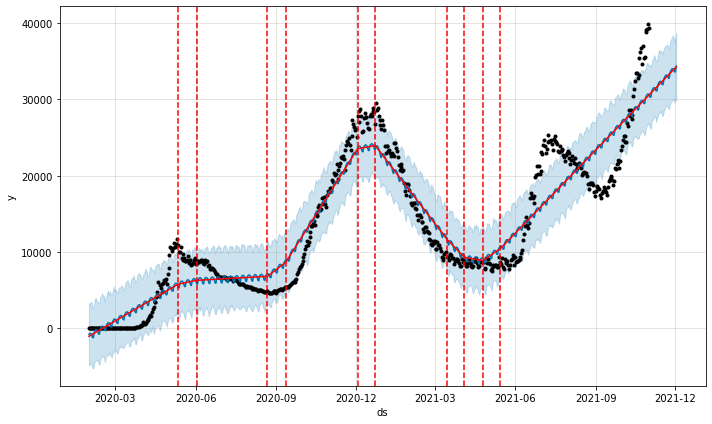

In [51]:
from fbprophet.plot import add_changepoints_to_plot

# This particular feature helps us identify trend changes that are infered by the model

fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)